# **New York City Yellow Taxi Data**

**Name: Madhurashree M**
**Batch Number: C75**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [4]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [6]:
# Import the libraries you will be using for analysis
!pip install numpy==1.26.4
!pip install pandas==2.2.2
!pip install matplotlib==3.10.0
!pip install seaborn==0.13.2

In [2]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [10]:
# Try loading one file

df = pd.read_parquet('/Users/madhurashreem/Desktop/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [14]:
import pandas as pd
import glob
import os

# Define the path to the folder containing Parquet files
folder_path = '/Users/madhurashree/Documents/study/ML_AI/EDA-Assignment/Datasets and Dictionary/trip_records/'

# Get list of all Parquet files in the folder
file_paths = sorted(glob.glob(os.path.join(folder_path, '*.parquet')))

# Read each Parquet file into a DataFrame and store in a list
dfs = [pd.read_parquet(file) for file in file_paths]

# Initialize an empty DataFrame to store sampled data
sampled_data = pd.DataFrame()

# Loop through each DataFrame (for each month)
for idx, df in enumerate(dfs, start=1):
    
    # 'tpep_pickup_datetime' is a datetime column
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

    # Extract date and hour from 'tpep_pickup_datetime'
    df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

    # Loop through each unique date in the dataset
    for date in df['pickup_date'].unique():
        # Filter data for the date
        day_data = df[df['pickup_date'] == date]

        # Loop through each hour
        for hour in range(24):
            # Filter data for the current hour of the day
            hour_data = day_data[day_data['pickup_hour'] == hour]

            # Sample 5% of the data for the current hour
            sample = hour_data.sample(frac=0.05, random_state=42)

            # Append the sampled data to the final DataFrame
            sampled_data = pd.concat([sampled_data, sample])

# Reset the index for the final sampled data
sampled_data = sampled_data.reset_index(drop=True)

# Display the sampled data
print(sampled_data.head())

# Information about the sampled data
sampled_data.info()

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [12]:
# Load the new data file
# Store the df in csv/parquet
# df.to_parquet('')

sampled_data = pd.read_csv("/Users/madhurashreem/Desktop/sampled_nyc_taxi_data_2023.csv")

In [13]:
# df.head()
sampled_data.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN                NaN            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [16]:
# df.info()
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  pickup_date            object 
 20  pickup_hour            int64  
 21  Airport_fee            float64
dtypes: float64(13), in

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [18]:
# Fix the index and drop any columns that are not needed
sampled_nyc_2023_cleaned = sampled_data.reset_index(drop=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [20]:
sampled_nyc_2023_cleaned.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN                NaN            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [22]:
# Combine the two airport fee columns
sampled_nyc_2023_cleaned['airport_fee_combined'] = (sampled_nyc_2023_cleaned['airport_fee'].fillna(0) + sampled_nyc_2023_cleaned['Airport_fee'].fillna(0))

In [24]:
sampled_nyc_2023_cleaned.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN                NaN            66           107   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0             2  ...        0.00           0.0                    1.0   
1             1  ...        2.58           0.0                    1.0   
2             2  ...        0.00           0.0                    1.0   
3             2  ...        0.00           0.0                    1.0   
4             0  ...        5.93           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee  pickup_date  pickup_hour  \
0         41.15                   0.0         1.25   2023-01-01            0   
1         15.48                   2.5         0.00   2023-01-01            0   
2         16.40                   2.5         0.00   2023-01-01            0   
3         11.50                   2.5         0.00   2023-01-01            0   
4         35.57                   NaN          NaN   2023-01-01            0   

   Airport_fee airport_fee_combined  
0          NaN                 1.25  
1          NaN                 0.00  
2          NaN                 0.00  
3          NaN                 0.00  
4          NaN                 0.00  

[5 rows x 23 columns]

In [26]:
sampled_nyc_2023_cleaned = sampled_nyc_2023_cleaned.drop(columns=['airport_fee', 'Airport_fee'])

In [27]:
sampled_nyc_2023_cleaned.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN                NaN            66           107   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    6.0      0.5        0.00           0.0   
1             1  ...    1.0      0.5        2.58           0.0   
2             2  ...    1.0      0.5        0.00           0.0   
3             2  ...    1.0      0.5        0.00           0.0   
4             0  ...    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  pickup_date  \
0                    1.0         41.15                   0.0   2023-01-01   
1                    1.0         15.48                   2.5   2023-01-01   
2                    1.0         16.40                   2.5   2023-01-01   
3                    1.0         11.50                   2.5   2023-01-01   
4                    1.0         35.57                   NaN   2023-01-01   

  pickup_hour  airport_fee_combined  
0           0                  1.25  
1           0                  0.00  
2           0                  0.00  
3           0                  0.00  
4           0                  0.00  

[5 rows x 21 columns]

In [30]:
sampled_nyc_2023_cleaned = sampled_nyc_2023_cleaned.rename(columns={'airport_fee_combined':'Airport_fee'})

In [32]:
sampled_nyc_2023_cleaned.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN                NaN            66           107   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    6.0      0.5        0.00           0.0   
1             1  ...    1.0      0.5        2.58           0.0   
2             2  ...    1.0      0.5        0.00           0.0   
3             2  ...    1.0      0.5        0.00           0.0   
4             0  ...    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  pickup_date  \
0                    1.0         41.15                   0.0   2023-01-01   
1                    1.0         15.48                   2.5   2023-01-01   
2                    1.0         16.40                   2.5   2023-01-01   
3                    1.0         11.50                   2.5   2023-01-01   
4                    1.0         35.57                   NaN   2023-01-01   

  pickup_hour  Airport_fee  
0           0         1.25  
1           0         0.00  
2           0         0.00  
3           0         0.00  
4           0         0.00  

[5 rows x 21 columns]

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [34]:
# check where values of fare amount are negative
negative_fares = sampled_nyc_2023_cleaned[sampled_nyc_2023_cleaned['fare_amount'] < 0]
print(negative_fares)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour, Airport_fee]
Index: []

[0 rows x 21 columns]


Did you notice something different in the `RatecodeID` column for above records?

In [37]:
# Analyse RatecodeID for the negative fare amounts

# Since there is no data with negative fare amounts, no suspicious patterns can be observed in the RatecodeID column.

In [39]:
sampled_nyc_2023_cleaned.shape

(1896400, 21)

In [41]:
# Find which columns have negative values
columns_to_check = ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']
negative_counts = {}
for col in columns_to_check:
    negative_counts[col] = (sampled_nyc_2023_cleaned[col] < 0).sum()
negative_counts_df = pd.DataFrame.from_dict(negative_counts, orient='index', columns=['Negative Value Count'])
print(negative_counts_df)

                       Negative Value Count
extra                                     3
mta_tax                                  73
improvement_surcharge                    78
total_amount                             78
congestion_surcharge                     56
Airport_fee                              15


In [43]:
# fix these negative values
columns_to_check = ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']

sampled_nyc_2023_cleaned_new = sampled_nyc_2023_cleaned[~(sampled_nyc_2023_cleaned[columns_to_check] < 0).any(axis=1)].copy()

print(f"Original shape: {sampled_nyc_2023_cleaned.shape}")
print(f"Cleaned shape: {sampled_nyc_2023_cleaned_new.shape}")

Original shape: (1896400, 21)
Cleaned shape: (1896321, 21)


In [45]:
columns_to_check = ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']
negative_counts = {}
for col in columns_to_check:
    negative_counts[col] = (sampled_nyc_2023_cleaned_new[col] < 0).sum()
negative_counts_df = pd.DataFrame.from_dict(negative_counts, orient='index', columns=['Negative Value Count'])
print(negative_counts_df)

                       Negative Value Count
extra                                     0
mta_tax                                   0
improvement_surcharge                     0
total_amount                              0
congestion_surcharge                      0
Airport_fee                               0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [49]:
# Find the proportion of missing values in each column
missing_proportion = sampled_nyc_2023_cleaned_new.isnull().mean()
print(missing_proportion)

VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          0.03421
trip_distance            0.00000
RatecodeID               0.03421
store_and_fwd_flag       0.03421
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     0.03421
pickup_date              0.00000
pickup_hour              0.00000
Airport_fee              0.00000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [52]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
missing_passenger_count = sampled_nyc_2023_cleaned_new[sampled_nyc_2023_cleaned_new['passenger_count'].isnull()]
mode_value = sampled_nyc_2023_cleaned_new['passenger_count'].mode()[0]
sampled_nyc_2023_cleaned_new['passenger_count'].fillna(mode_value, inplace=True)

Did you find zeroes in passenger_count? Handle these.

In [55]:
zero_passenger_count = sampled_nyc_2023_cleaned_new[sampled_nyc_2023_cleaned_new['passenger_count'] == 0]
print(f"Number of rows with zero passengers {len(zero_passenger_count)}")

Number of rows with zero passengers 29681


In [57]:
# Replacing passenger_count = 0 with mode value
mode_value_passenger = sampled_nyc_2023_cleaned_new['passenger_count'].mode()[0]
sampled_nyc_2023_cleaned_new.loc[sampled_nyc_2023_cleaned_new['passenger_count'] == 0, 'passenger_count'] = mode_value_passenger

In [59]:
zero_passenger_count = sampled_nyc_2023_cleaned_new[sampled_nyc_2023_cleaned_new['passenger_count'] == 0]
print(f"Number of rows with zero passengers after imputing with mode {len(zero_passenger_count)}")

Number of rows with zero passengers after imputing with mode 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [61]:
# Fix missing values in 'RatecodeID'
missing_RatecodeID = sampled_nyc_2023_cleaned_new[sampled_nyc_2023_cleaned_new['RatecodeID'].isnull()]
print(f"Number of rows with missing RatecodeID {len(missing_RatecodeID)}")

Number of rows with missing RatecodeID 64874


In [63]:
mode_value_RatecodeID = sampled_nyc_2023_cleaned_new['RatecodeID'].mode()[0]
sampled_nyc_2023_cleaned_new['RatecodeID'].fillna(mode_value, inplace=True)

In [65]:
missing_RatecodeID = sampled_nyc_2023_cleaned_new[sampled_nyc_2023_cleaned_new['RatecodeID'].isnull()]
print(f"Number of rows with missing RatecodeID {len(missing_RatecodeID)}")

Number of rows with missing RatecodeID 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [68]:
# handle null values in congestion_surcharge
missing_congestion_surcharge = sampled_nyc_2023_cleaned_new[sampled_nyc_2023_cleaned_new['congestion_surcharge'].isnull()]
print(f"Number of rows with missing congestion_surcharge {len(missing_congestion_surcharge)}")

Number of rows with missing congestion_surcharge 64874


In [70]:
sampled_nyc_2023_cleaned_new['congestion_surcharge'].describe()

count    1.831447e+06
mean     2.307700e+00
std      6.661607e-01
min      0.000000e+00
25%      2.500000e+00
50%      2.500000e+00
75%      2.500000e+00
max      2.500000e+00
Name: congestion_surcharge, dtype: float64

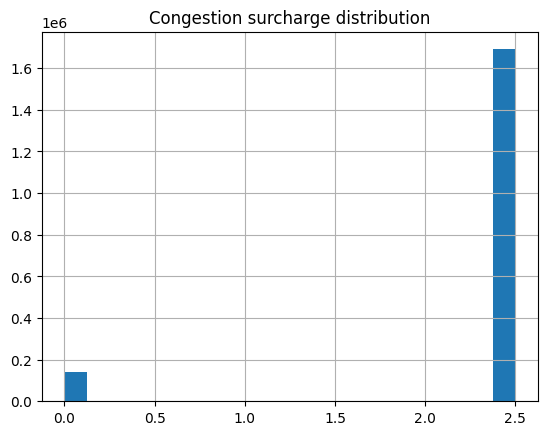

In [72]:
sampled_nyc_2023_cleaned_new['congestion_surcharge'].hist(bins=20)
plt.title("Congestion surcharge distribution")
plt.show()

In [74]:
# Since values are highly skewed (with some very high or very low values), the median is more robust and won’t be affected by outliers.
median_congestion_surcharge = sampled_nyc_2023_cleaned_new['congestion_surcharge'].median()
sampled_nyc_2023_cleaned_new['congestion_surcharge'].fillna(median_congestion_surcharge, inplace=True)

In [76]:
missing_congestion_surcharge = sampled_nyc_2023_cleaned_new[sampled_nyc_2023_cleaned_new['congestion_surcharge'].isnull()]
print(f"Number of rows with missing congestion_surcharge {len(missing_congestion_surcharge)}")

Number of rows with missing congestion_surcharge 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [79]:
# Handle any remaining missing values
miss_values = sampled_nyc_2023_cleaned_new.isnull().sum()
print(miss_values[miss_values > 0])

store_and_fwd_flag    64874
dtype: int64


In [81]:
mode_store_and_fwd_flag = sampled_nyc_2023_cleaned_new['store_and_fwd_flag'].mode()[0]
sampled_nyc_2023_cleaned_new['store_and_fwd_flag'].fillna(mode_store_and_fwd_flag, inplace=True)

In [83]:
miss_values_latest = sampled_nyc_2023_cleaned_new.isnull().sum()
print(miss_values_latest[miss_values_latest > 0])

Series([], dtype: int64)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [85]:
sampled_nyc_2023_cleaned_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896321 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  pickup_date            object 
 19  pickup_hour            int64  
 20  Airport_fee            float64
dtypes: float64(12), int64(5), object(4)
memory usage: 318.3+ MB

In [87]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
numeric_col = sampled_nyc_2023_cleaned_new.select_dtypes(include='number').columns

def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

outliers_dict = {}
for c in numeric_col:
    outliers_dict[c] = detect_outliers(sampled_nyc_2023_cleaned_new, c)

for c, outliers in outliers_dict.items():
    print(f"{c}: {len(outliers)} outliers")

VendorID: 444 outliers
passenger_count: 424598 outliers
trip_distance: 249288 outliers
RatecodeID: 102238 outliers
PULocationID: 0 outliers
DOLocationID: 0 outliers
payment_type: 403949 outliers
fare_amount: 197413 outliers
extra: 34047 outliers
mta_tax: 17865 outliers
tip_amount: 145673 outliers
tolls_amount: 153802 outliers
improvement_surcharge: 2181 outliers
total_amount: 218083 outliers
congestion_surcharge: 140875 outliers
pickup_hour: 0 outliers
Airport_fee: 160947 outliers


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [89]:
sampled_nyc_2023_cleaned_new.shape

(1896321, 21)

In [91]:
# remove passenger_count > 6
sampled_nyc_2023_cleaned_new = sampled_nyc_2023_cleaned_new[sampled_nyc_2023_cleaned_new['passenger_count'] <= 6]

In [92]:
sampled_nyc_2023_cleaned_new.shape

(1896300, 21)

In [95]:
# Continue with outlier handling

# Entries where trip_distance is nearly 0 and fare_amount is more than 300
sampled_nyc_2023_cleaned_new = sampled_nyc_2023_cleaned_new[~((sampled_nyc_2023_cleaned_new['trip_distance'] < 0.1) & (sampled_nyc_2023_cleaned_new['fare_amount'] > 300))]

In [97]:
sampled_nyc_2023_cleaned_new.shape

(1896265, 21)

In [99]:
# Remove rows where trip_distance and fare_amount are both 0 but the zones are different
sampled_nyc_2023_cleaned_new = sampled_nyc_2023_cleaned_new[~((sampled_nyc_2023_cleaned_new['trip_distance'] == 0) & 
                                                     (sampled_nyc_2023_cleaned_new['fare_amount'] == 0) & 
                                                     (sampled_nyc_2023_cleaned_new['PULocationID'] != sampled_nyc_2023_cleaned_new['DOLocationID']))]

In [101]:
sampled_nyc_2023_cleaned_new.shape

(1896206, 21)

In [103]:
# Fix entries where trip_distance is more than 250 miles
sampled_nyc_2023_cleaned_new = sampled_nyc_2023_cleaned_new[sampled_nyc_2023_cleaned_new['trip_distance'] <= 250]

In [105]:
sampled_nyc_2023_cleaned_new.shape

(1896160, 21)

In [107]:
# Fix entries where payment_type is 0
sampled_nyc_2023_cleaned_new = sampled_nyc_2023_cleaned_new[sampled_nyc_2023_cleaned_new['payment_type'] != 0]

In [109]:
sampled_nyc_2023_cleaned_new.shape

(1831316, 21)

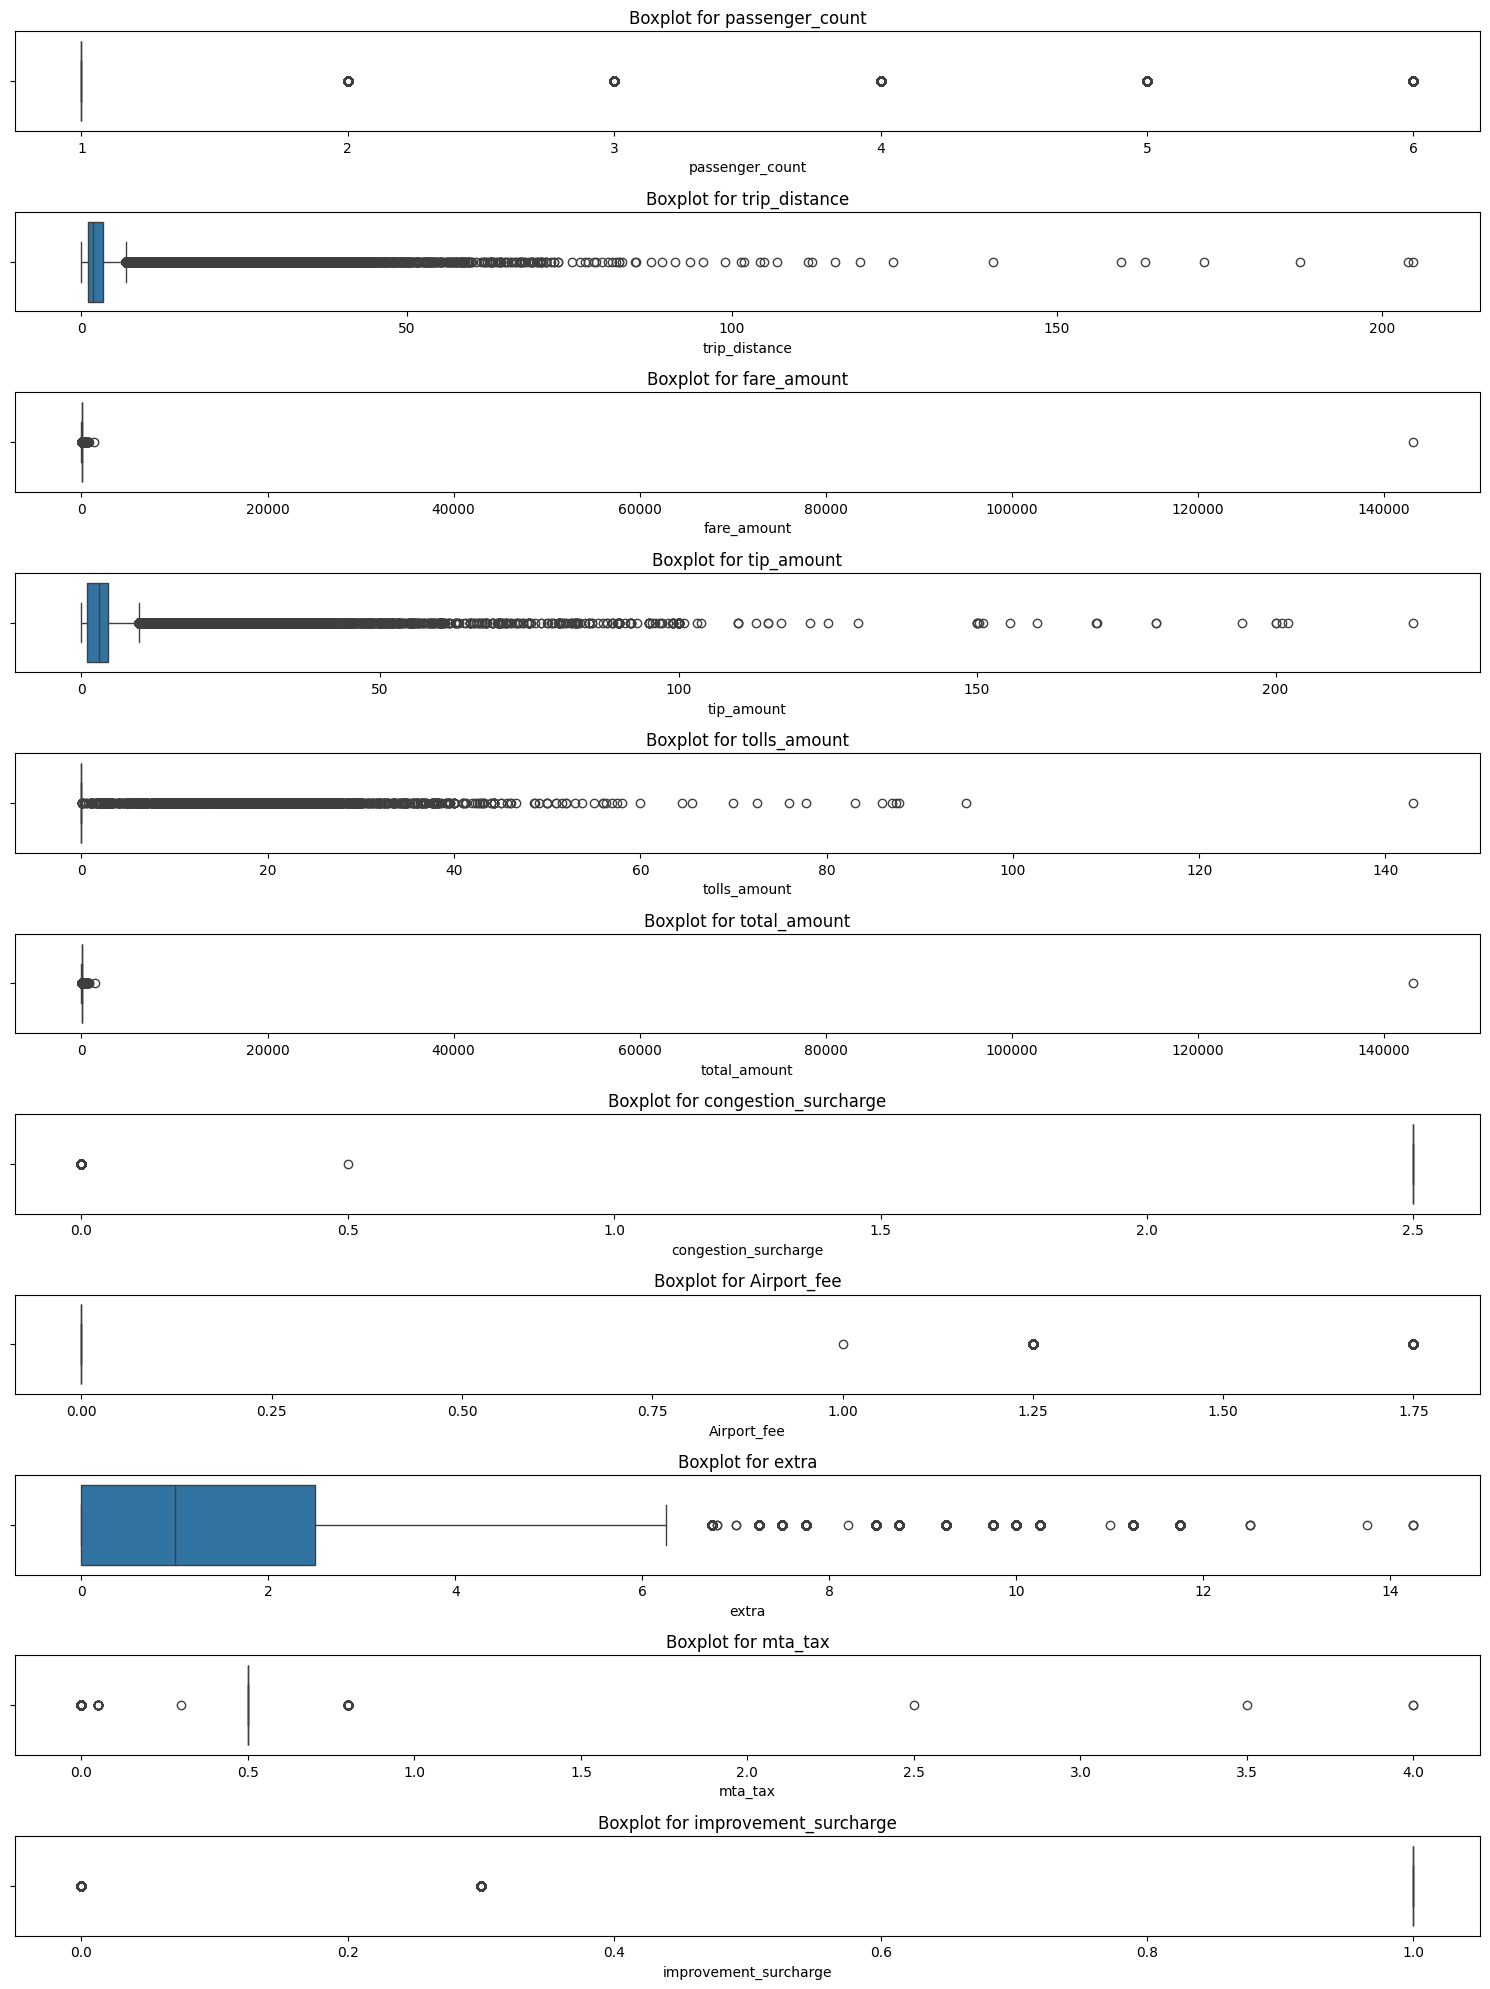

In [111]:
cols_to_check = [
    'passenger_count', 'trip_distance', 'fare_amount', 'tip_amount',
    'tolls_amount', 'total_amount', 'congestion_surcharge',
    'Airport_fee', 'extra', 'mta_tax', 'improvement_surcharge'
]

plt.figure(figsize=(15, 20))
for i, col in enumerate(cols_to_check):
    plt.subplot(len(cols_to_check), 1, i+1)
    sns.boxplot(data=sampled_nyc_2023_cleaned_new, x=col)
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

In [113]:
# Remove records where tip_amount is greater than 150 - extreme values
sampled_nyc_2023_cleaned_new = sampled_nyc_2023_cleaned_new[sampled_nyc_2023_cleaned_new['tip_amount'] <= 150]

In [115]:
# Remove records where tolls_amount is greater than 100 - extreme values 
sampled_nyc_2023_cleaned_new = sampled_nyc_2023_cleaned_new[sampled_nyc_2023_cleaned_new['tolls_amount'] <= 100]

In [117]:
# Remove records where total_amount is greater than 20000 - extreme values 
sampled_nyc_2023_cleaned_new = sampled_nyc_2023_cleaned_new[sampled_nyc_2023_cleaned_new['total_amount'] <= 20000]

In [119]:
# Remove records where extra is greater than 12.5 - extreme values 
sampled_nyc_2023_cleaned_new = sampled_nyc_2023_cleaned_new[sampled_nyc_2023_cleaned_new['extra'] <= 12.5]

In [121]:
# Do any columns need standardising?
# sampled_nyc_2023_cleaned_new.info()

sampled_nyc_2023_cleaned_new['tpep_pickup_datetime'] = pd.to_datetime(sampled_nyc_2023_cleaned_new['tpep_pickup_datetime'])
sampled_nyc_2023_cleaned_new['tpep_dropoff_datetime'] = pd.to_datetime(sampled_nyc_2023_cleaned_new['tpep_dropoff_datetime'])

In [123]:
sampled_nyc_2023_cleaned_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1831296 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  pickup_date            obje

In [125]:
sampled_nyc_2023_cleaned_new.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_date              0
pickup_hour              0
Airport_fee              0
dtype: int64

In [127]:
sampled_nyc_2023_cleaned_new.shape

(1831296, 21)

In [147]:
sampled_nyc_2023_cleaned_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1831296 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  pickup_date            obje

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [135]:
sampled_nyc_2023_cleaned_new.to_csv('/Users/madhurashreem/nyc_2023_eda.csv', index=False)

In [6]:
nyc_2023_eda = pd.read_csv("/Users/madhurashreem/nyc_2023_eda.csv")

In [7]:
nyc_2023_eda.shape

(1831296, 21)

In [10]:
nyc_2023_eda.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [13]:
nyc_2023_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831296 entries, 0 to 1831295
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  pickup_date            object 
 19  pickup_hour            int64  
 20  Airport_fee            float64
dtypes: float64(12), int64(5), object(4)
memory usage: 293.

In [15]:
# Extract the hour, day of the week, and month from the pickup datetime
nyc_2023_eda['tpep_pickup_datetime'] = pd.to_datetime(nyc_2023_eda['tpep_pickup_datetime'])
nyc_2023_eda['tpep_dropoff_datetime'] = pd.to_datetime(nyc_2023_eda['tpep_dropoff_datetime'])


nyc_2023_eda['pickup_hour'] = nyc_2023_eda['tpep_pickup_datetime'].dt.hour
nyc_2023_eda['pickup_day_of_week'] = nyc_2023_eda['tpep_pickup_datetime'].dt.dayofweek
nyc_2023_eda['pickup_month'] = nyc_2023_eda['tpep_pickup_datetime'].dt.month

In [16]:
nyc_2023_eda.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4           7.10         1.0                  N           246            37   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0             2  ...        0.00           0.0                    1.0   
1             1  ...        2.58           0.0                    1.0   
2             2  ...        0.00           0.0                    1.0   
3             2  ...        0.00           0.0                    1.0   
4             1  ...        7.90           0.0                    1.0   

   total_amount  congestion_surcharge  pickup_date  pickup_hour  Airport_fee  \
0         41.15                   0.0   2023-01-01            0         1.25   
1         15.48                   2.5   2023-01-01            0         0.00   
2         16.40                   2.5   2023-01-01            0         0.00   
3         11.50                   2.5   2023-01-01            0         0.00   
4         47.40                   2.5   2023-01-01            0         0.00   

  pickup_day_of_week  pickup_month  
0                  6             1  
1                  6             1  
2                  6             1  
3                  6             1  
4                  6             1  

[5 rows x 23 columns]

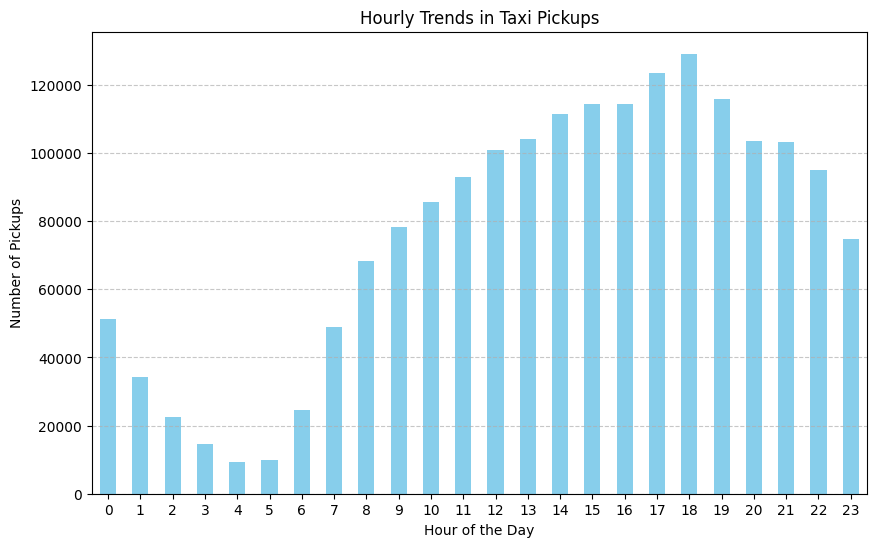

In [19]:
# Find and show the hourly trends in taxi pickups
hourly_trends = nyc_2023_eda['pickup_hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
hourly_trends.plot(kind='bar', color='skyblue')
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

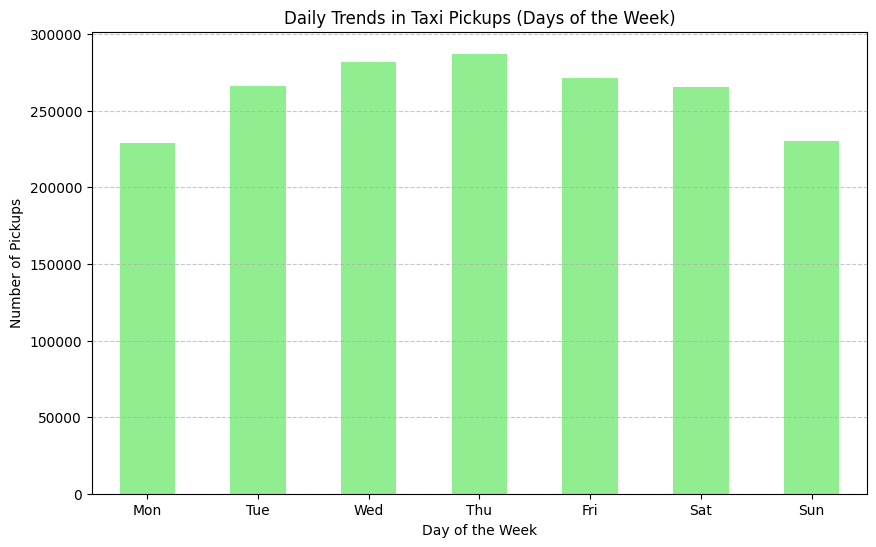

In [21]:
# Find and show the daily trends in taxi pickups (days of the week)
day_of_week_trends = nyc_2023_eda['pickup_day_of_week'].value_counts().sort_index()
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(10, 6))
day_of_week_trends.reindex(range(7)).plot(kind='bar', color='lightgreen')
plt.title('Daily Trends in Taxi Pickups (Days of the Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(7), labels=days_of_week, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

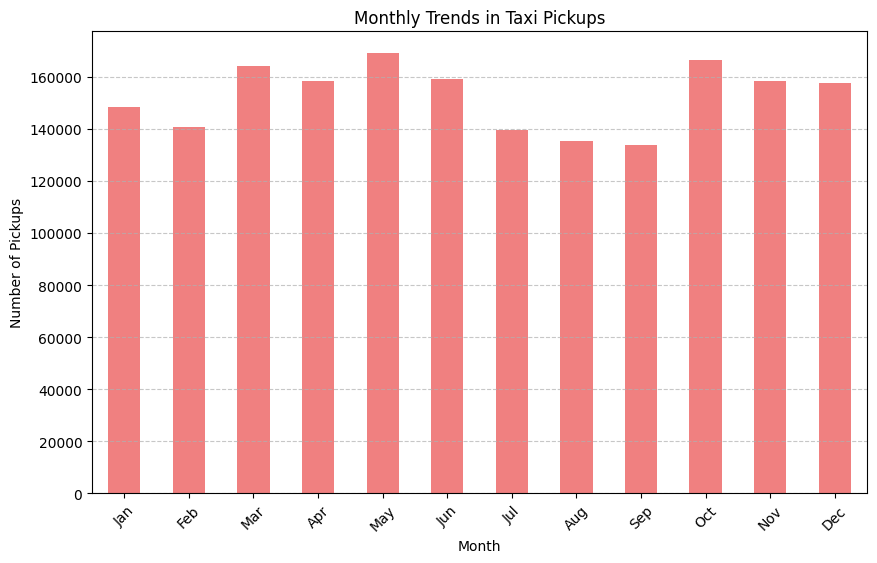

In [23]:
# Show the monthly trends in pickups
monthly_trends = nyc_2023_eda['pickup_month'].value_counts().sort_index()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 6))
monthly_trends.reindex(range(1, 13)).plot(kind='bar', color='lightcoral')
plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(12), labels=months, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [25]:
# Analyse the above parameters
financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
zero_negative_values = nyc_2023_eda[financial_columns].lt(0).any(axis=1) | \
                        nyc_2023_eda[financial_columns].eq(0).any(axis=1)

nyc_2023_eda[zero_negative_values]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
9               2  2023-01-01 00:14:47   2023-01-01 00:20:18              1.0   
14              2  2023-01-01 00:56:42   2023-01-01 01:00:25              1.0   
...           ...                  ...                   ...              ...   
1831275         1  2023-09-30 23:44:06   2023-09-30 23:50:59              1.0   
1831284         1  2023-09-30 23:41:35   2023-10-01 00:04:10              1.0   
1831285         2  2023-09-30 23:53:03   2023-10-01 00:13:48              1.0   
1831286         2  2023-09-30 23:37:17   2023-09-30 23:46:07              1.0   
1831294         1  2023-09-30 23:26:31   2023-10-01 00:04:05              2.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 7.74         1.0                  N           138   
2                 1.44         1.0                  N           237   
3                 0.54         1.0                  N           143   
9                 0.78         1.0                  N           237   
14                0.74         1.0                  N           229   
...                ...         ...                ...           ...   
1831275           1.30         1.0                  Y           229   
1831284           2.80         1.0                  N            79   
1831285           9.65         1.0                  N           132   
1831286           0.86         1.0                  N           164   
1831294          13.20         1.0                  N           164   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
0                 256             2  ...         0.0           0.0   
2                 141             2  ...         0.0           0.0   
3                 142             2  ...         0.0           0.0   
9                 229             2  ...         0.0           0.0   
14                141             1  ...         0.0           0.0   
...               ...           ...  ...         ...           ...   
1831275           237             2  ...         0.0           0.0   
1831284           186             3  ...         0.0           0.0   
1831285           225             2  ...         0.0           0.0   
1831286           233             2  ...         0.0           0.0   
1831294            14             2  ...         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          1.0         41.15                   0.0   
2                          1.0         16.40                   2.5   
3                          1.0         11.50                   2.5   
9                          1.0         12.20                   2.5   
14                         1.0         10.80                   2.5   
...                        ...           ...                   ...   
1831275                    1.0         12.90                   2.5   
1831284                    1.0         22.70                   2.5   
1831285                    1.0         43.65                   0.0   
1831286                    1.0         14.30                   2.5   
1831294                    1.0         59.80                   2.5   

         pickup_date  pickup_hour  Airport_fee pickup_day_of_week  \
0         2023-01-01            0         1.25                  6   
2         2023-01-01            0         0.00                  6   
3         2023-01-01            0         0.00                  6   
9         2023-01-01            0         0.00                  6   
14        2023-01-01            0         0.00                  6   
...              ...          ...          ...                ...   
1831275   2023-09-

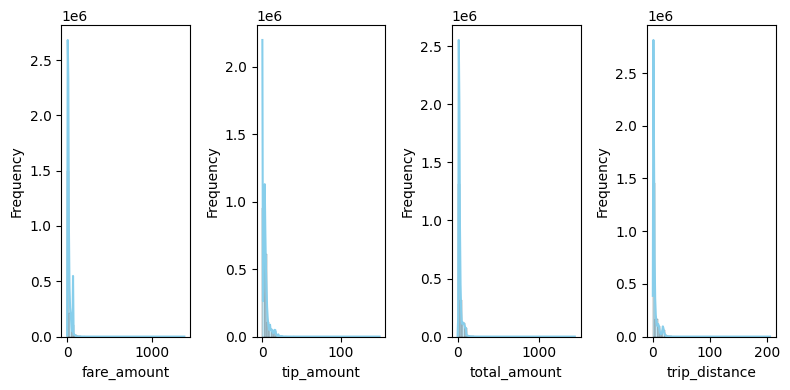

In [27]:
plt.figure(figsize=(8, 4))

for i, col in enumerate(financial_columns):
    plt.subplot(1, 4, i+1)
    sns.histplot(nyc_2023_eda[col], kde=True, bins=50, color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [29]:
# Create a new DataFrame excluding rows with zero values in financial columns
financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
nyc_2023_eda_new = nyc_2023_eda[(nyc_2023_eda[financial_columns] > 0).all(axis=1)]

In [ ]:
# nyc_2023_eda - Contains 'fare_amount', 'tip_amount', 'total_amount', 'trip_distance' zeros here
# nyc_2023_eda_new - DataFrame excluding rows with zero values in 'fare_amount', 'tip_amount', 'total_amount', 'trip_distance' coloumns

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [31]:
# Create a df with non zero entries for the selected parameters.
nyc_2023_eda_new.shape

(1412893, 23)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

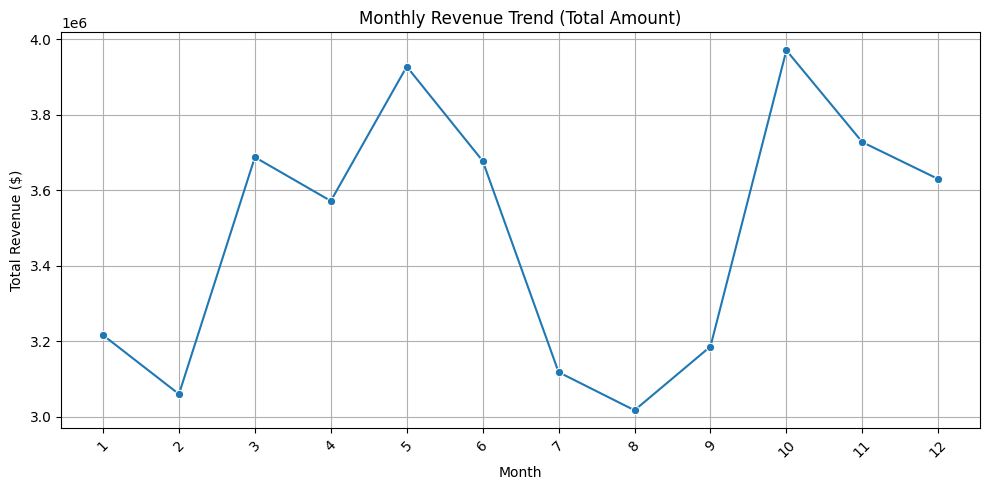

In [33]:
# Group data by month and analyse monthly revenue
# Group by month and sum the total_amount
monthly_revenue = nyc_2023_eda_new.groupby('pickup_month')['total_amount'].sum().reset_index()

# Convert Period to string for plotting
monthly_revenue['pickup_month'] = monthly_revenue['pickup_month'].astype(str)

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_revenue, x='pickup_month', y='total_amount', marker='o')
plt.title('Monthly Revenue Trend (Total Amount)')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [35]:
# Calculate proportion of each quarter
nyc_2023_eda_new['quarter'] = nyc_2023_eda_new['tpep_pickup_datetime'].dt.to_period('Q')

# Group by quarter and sum total_amount
quarterly_revenue = nyc_2023_eda_new.groupby('quarter')['total_amount'].sum().reset_index()

# Calculate proportion
total_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['revenue_proportion'] = quarterly_revenue['total_amount'] / total_revenue

# Display the result
print(quarterly_revenue)

  quarter  total_amount  revenue_proportion
0  2022Q4         13.50        3.230500e-07
1  2023Q1    9963435.90        2.384213e-01
2  2023Q2   11177055.05        2.674628e-01
3  2023Q3    9320830.18        2.230440e-01
4  2023Q4   11327859.86        2.710715e-01


/var/folders/1j/pf6jqyvj3d90y3d3cpb4rf8w0000gp/T/ipykernel_29319/1637448996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_2023_eda_new['quarter'] = nyc_2023_eda_new['tpep_pickup_datetime'].dt.to_period('Q')


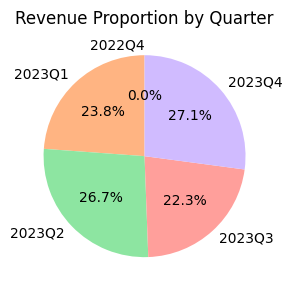

In [37]:
plt.figure(figsize=(3, 3))
plt.pie(
    quarterly_revenue['revenue_proportion'],
    labels=quarterly_revenue['quarter'].astype(str),
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')
)
plt.title('Revenue Proportion by Quarter')
plt.axis('equal')
plt.tight_layout()
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

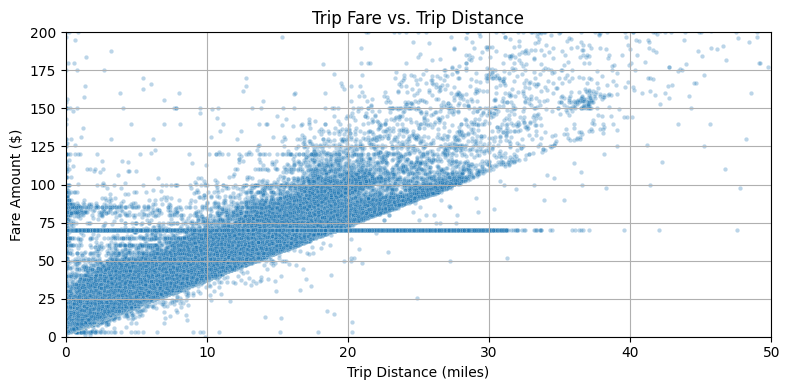

Correlation between trip_distance and fare_amount: 0.9497


In [39]:
# Show how trip fare is affected by distance
# Filter out rows where trip_distance is 0 even though we have already done this.
valid_trips = nyc_2023_eda_new[nyc_2023_eda_new['trip_distance'] > 0]

# Scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(data=valid_trips, x='trip_distance', y='fare_amount', alpha=0.3, s=10)
plt.title('Trip Fare vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.xlim(0, 50)  # Limit axis to focus on dense area
plt.ylim(0, 200)
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
correlation = valid_trips['trip_distance'].corr(valid_trips['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.4f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [41]:
nyc_2023_eda_new.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
5         2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
6         2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
7         2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
1           1.24         1.0                  N           161           237   
4           7.10         1.0                  N           246            37   
5           1.59         1.0                  N            79           164   
6           3.16         1.0                  N            79           256   
7           7.64         1.0                  N           132            95   

   payment_type  ...  tolls_amount  improvement_surcharge  total_amount  \
1             1  ...           0.0                    1.0         15.48   
4             1  ...           0.0                    1.0         47.40   
5             1  ...           0.0                    1.0         19.68   
6             1  ...           0.0                    1.0         30.12   
7             1  ...           0.0                    1.0         42.54   

   congestion_surcharge  pickup_date  pickup_hour  Airport_fee  \
1                   2.5   2023-01-01            0         0.00   
4                   2.5   2023-01-01            0         0.00   
5                   2.5   2023-01-01            0         0.00   
6                   2.5   2023-01-01            0         0.00   
7                   0.0   2023-01-01            0         1.25   

   pickup_day_of_week pickup_month  quarter  
1                   6            1   2023Q1  
4                   6            1   2023Q1  
5                   6            1   2023Q1  
6                   6            1   2023Q1  
7                   6            1   2023Q1  

[5 rows x 24 columns]

/var/folders/1j/pf6jqyvj3d90y3d3cpb4rf8w0000gp/T/ipykernel_29319/1379943734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_2023_eda_new['trip_duration'] = (


Correlation between fare_amount and trip_duration: 0.8603


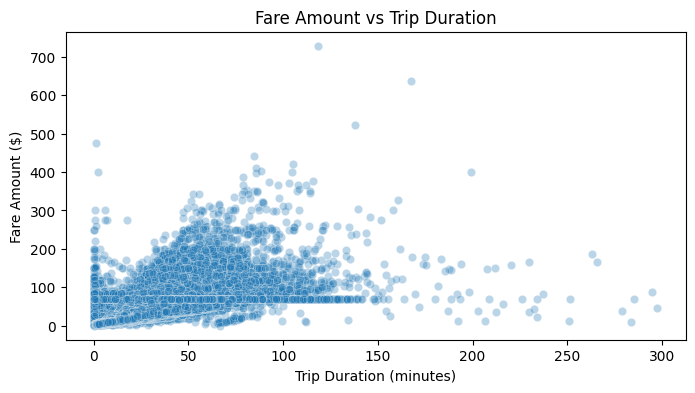

In [43]:
# Show relationship between fare and trip duration
nyc_2023_eda_new['trip_duration'] = (
    nyc_2023_eda_new['tpep_dropoff_datetime'] - 
    nyc_2023_eda_new['tpep_pickup_datetime']
).dt.total_seconds() / 60  # in minutes

valid_duration = nyc_2023_eda_new[
    (nyc_2023_eda_new['trip_duration'] > 0) &
    (nyc_2023_eda_new['trip_duration'] < 300)  # Assuming 5 hours as a reasonable max
]

correlation = valid_duration['fare_amount'].corr(valid_duration['trip_duration'])
print(f"Correlation between fare_amount and trip_duration: {correlation:.4f}")

plt.figure(figsize=(8, 4))
sns.scatterplot(data=valid_duration, x='trip_duration', y='fare_amount', alpha=0.3)
plt.title('Fare Amount vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.show()


Correlation between fare_amount and passenger_count: 0.0387


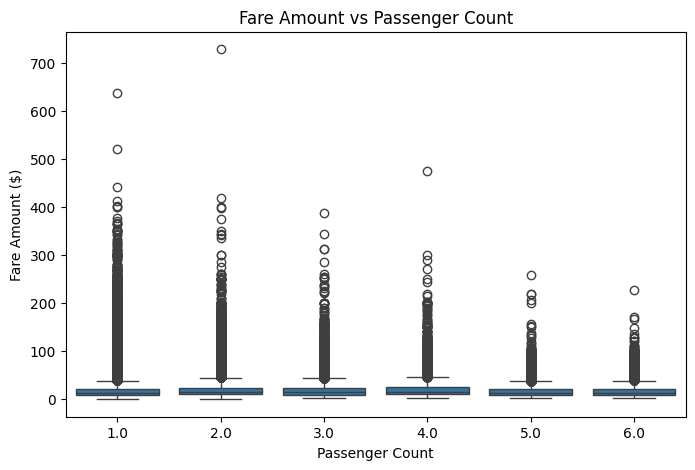

In [45]:
# Show relationship between fare and number of passengers
valid_passenger = nyc_2023_eda_new[
    (nyc_2023_eda_new['passenger_count'] > 0) &
    (nyc_2023_eda_new['passenger_count'] <= 6)
]

correlation = valid_passenger['fare_amount'].corr(valid_passenger['passenger_count'])
print(f"Correlation between fare_amount and passenger_count: {correlation:.4f}")

plt.figure(figsize=(8, 5))
sns.boxplot(data=valid_passenger, x='passenger_count', y='fare_amount')
plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

Correlation between tip_amount and trip_distance: 0.8044


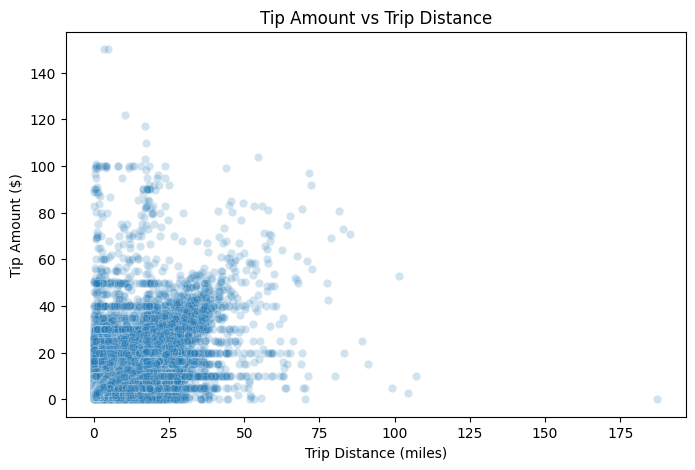

In [47]:
# Show relationship between tip and trip distance
valid_distance = nyc_2023_eda_new[nyc_2023_eda_new['trip_distance'] > 0]

correlation = valid_distance['tip_amount'].corr(valid_distance['trip_distance'])
print(f"Correlation between tip_amount and trip_distance: {correlation:.4f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(data=valid_distance, x='trip_distance', y='tip_amount', alpha=0.2)
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
Credit card    1492280
Cash            316341
No charge         9006
Dispute          13669
Name: count, dtype: int64


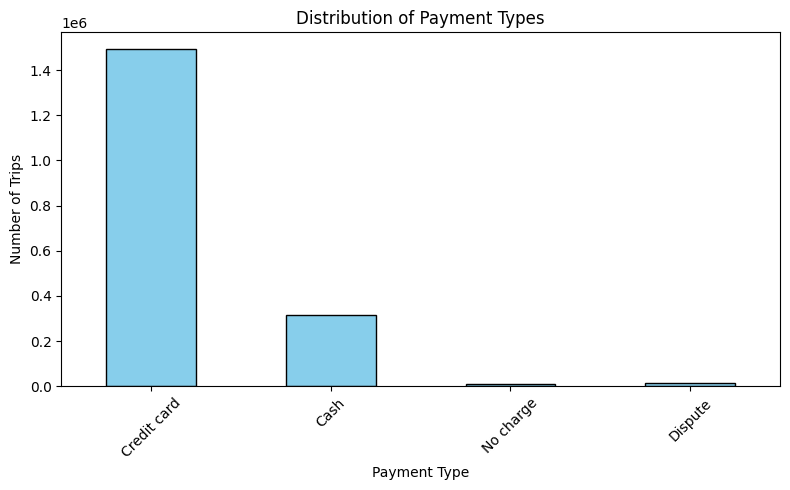

In [49]:
# Analyse the distribution of different payment types (payment_type).
payment_counts = nyc_2023_eda['payment_type'].value_counts().sort_index()
# Map payment type IDs to labels
payment_labels = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute'
}
# Replace index values with labels
payment_counts.index = payment_counts.index.map(payment_labels)
# Display value counts
print(payment_counts)
# Plot
plt.figure(figsize=(8,5))
payment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
conda install -c conda-forge geopandas

In [225]:
# !pip install geopandas

In [51]:
import geopandas as gpd

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [55]:
import geopandas as gpd

shapefile_path = '/Users/madhurashreem/taxi_zones/taxi_zones.shp'
# Read the shapefile using geopandas
zones = gpd.read_file(shapefile_path)
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05...  
1         Queens  MULTIPOLYGON (((1.03e+06 1.72e+05, 1.03e+06 1....  
2          Bronx  POLYGON ((1.03e+06 2.57e+05, 1.03e+06 2.57e+05...  
3      Manhattan  POLYGON ((9.92e+05 2.04e+05, 9.92e+05 2.04e+05...  
4  Staten Island  POLYGON ((9.36e+05 1.44e+05, 9.36e+05 1.44e+05...

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [61]:
# Merge zones and trip records using locationID and PULocationID
df_merged = nyc_2023_eda.merge(zones[['LocationID', 'zone', 'borough']], 
                     how='left', 
                     left_on='PULocationID', 
                     right_on='LocationID')

# Optionally rename the merged columns for clarity
df_merged.rename(columns={'zone': 'pickup_zone', 'borough': 'pickup_borough'}, inplace=True)

# Drop the duplicate 'LocationID' column if needed
df_merged.drop(columns=['LocationID'], inplace=True)

# Preview
df_merged[['PULocationID', 'pickup_zone', 'pickup_borough']].head()

PULocationID                pickup_zone pickup_borough
0           138          LaGuardia Airport         Queens
1           161             Midtown Center      Manhattan
2           237      Upper East Side South      Manhattan
3           143        Lincoln Square West      Manhattan
4           246  West Chelsea/Hudson Yards      Manhattan

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [63]:
# Group data by location and calculate the number of trips
pickup_trip_counts = df_merged.groupby('pickup_zone').size().reset_index(name='num_trips')

# Sort in descending order to see top pickup locations
pickup_trip_counts = pickup_trip_counts.sort_values(by='num_trips', ascending=False)

# Preview
pickup_trip_counts.head()

pickup_zone  num_trips
119            JFK Airport      96815
228  Upper East Side South      86903
152         Midtown Center      85944
227  Upper East Side North      77514
153           Midtown East      65633

In [65]:
pickup_trip_counts.tail()

pickup_zone  num_trips
79     Eltingville/Annadale/Prince's Bay          1
105                  Grymes Hill/Clifton          1
212                            Stapleton          1
163               New Dorp/Midland Beach          1
24   Breezy Point/Fort Tilden/Riis Beach          1

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [67]:
# Merge trip counts back to the zones GeoDataFrame
zone_trip_map = zones.merge(pickup_trip_counts, how='left', left_on='zone', right_on='pickup_zone')

# Replace NaN with 0 for zones with no trips
zone_trip_map['num_trips'] = zone_trip_map['num_trips'].fillna(0)

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [69]:
zones_with_trips = zones.merge(pickup_trip_counts, 
                               how='left', 
                               left_on='zone', 
                               right_on='pickup_zone')

# Replace NaN values with 0 (for zones with no trips)
zones_with_trips['num_trips'] = zones_with_trips['num_trips'].fillna(0)

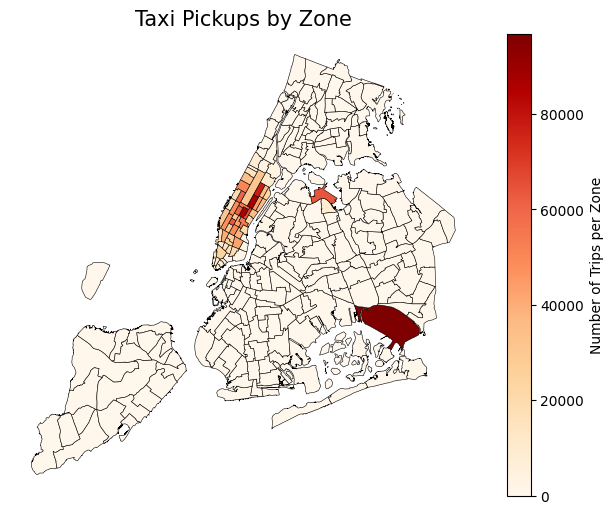

In [71]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# Plot map
zones_with_trips.plot(
    column='num_trips',
    ax=ax,
    legend=True,
    cmap='OrRd',  # Or any colormap like 'Blues', 'Greens', 'viridis'
    legend_kwds={'label': "Number of Trips per Zone", 'orientation': "vertical"},
    edgecolor='black',
    linewidth=0.4
)
# Set a title and remove axis ticks
ax.set_title('Taxi Pickups by Zone', fontsize=15)
ax.set_axis_off()
# Show the plot
plt.show()

In [73]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones_with_trips.sort_values(by='num_trips', ascending=False)

# Display the top records
zones_sorted[['LocationID', 'zone', 'borough', 'num_trips']].head(10)

LocationID                          zone    borough  num_trips
131         132                   JFK Airport     Queens    96815.0
236         237         Upper East Side South  Manhattan    86903.0
160         161                Midtown Center  Manhattan    85944.0
235         236         Upper East Side North  Manhattan    77514.0
161         162                  Midtown East  Manhattan    65633.0
137         138             LaGuardia Airport     Queens    64171.0
185         186  Penn Station/Madison Sq West  Manhattan    63470.0
229         230     Times Sq/Theatre District  Manhattan    61314.0
141         142           Lincoln Square East  Manhattan    60884.0
169         170                   Murray Hill  Manhattan    54490.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [75]:
# Merge pickup zone and borough from zones using PULocationID
df_with_pickup_zone = nyc_2023_eda.merge(
    zones[['LocationID', 'zone', 'borough']],
    how='left',
    left_on='PULocationID',
    right_on='LocationID'
).rename(columns={'zone': 'pickup_zone', 'borough': 'pickup_borough'}).drop(columns=['LocationID'])

# Merge dropoff zone and borough using DOLocationID
df_with_zones = df_with_pickup_zone.merge(
    zones[['LocationID', 'zone', 'borough']],
    how='left',
    left_on='DOLocationID',
    right_on='LocationID'
).rename(columns={'zone': 'dropoff_zone', 'borough': 'dropoff_borough'}).drop(columns=['LocationID'])

In [77]:
df_with_zones.to_csv('/Users/madhurashreem/df_with_zones.csv')

In [80]:
df_with_zones.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4           7.10         1.0                  N           246            37   

   payment_type  ...  congestion_surcharge  pickup_date  pickup_hour  \
0             2  ...                   0.0   2023-01-01            0   
1             1  ...                   2.5   2023-01-01            0   
2             2  ...                   2.5   2023-01-01            0   
3             2  ...                   2.5   2023-01-01            0   
4             1  ...                   2.5   2023-01-01            0   

   Airport_fee  pickup_day_of_week  pickup_month                pickup_zone  \
0         1.25                   6             1          LaGuardia Airport   
1         0.00                   6             1             Midtown Center   
2         0.00                   6             1      Upper East Side South   
3         0.00                   6             1        Lincoln Square West   
4         0.00                   6             1  West Chelsea/Hudson Yards   

   pickup_borough               dropoff_zone  dropoff_borough  
0          Queens  Williamsburg (South Side)         Brooklyn  
1       Manhattan      Upper East Side South        Manhattan  
2       Manhattan            Lenox Hill West        Manhattan  
3       Manhattan        Lincoln Square East        Manhattan  
4       Manhattan             Bushwick South         Brooklyn  

[5 rows x 27 columns]

In [84]:
# Find routes which have the slowest speeds at different times of the day

df_with_zones['trip_duration'] = (df_with_zones['tpep_dropoff_datetime'] - df_with_zones['tpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes

# Step 1: Filter invalid trips
df_valid = df_with_zones[
    (df_with_zones['trip_duration'] > 0) & 
    (df_with_zones['trip_distance'] > 0)
].copy()

# Step 2: Convert duration to hours
df_valid['trip_duration_hours'] = df_valid['trip_duration'] / 60

# Step 3: Group by route and hour
grouped = df_valid.groupby(['pickup_zone', 'dropoff_zone', 'pickup_hour']).agg(
    avg_distance=('trip_distance', 'mean'),
    avg_duration_hr=('trip_duration_hours', 'mean'),
    trip_count=('trip_distance', 'count')
).reset_index()

# Step 4: Calculate speed
grouped['speed_mph'] = grouped['avg_distance'] / grouped['avg_duration_hr']

# Step 5: Filter for meaningful routes (e.g., at least 10 trips)
meaningful_routes = grouped[grouped['trip_count'] >= 10]

# Step 6: Find slowest routes by sorting
slowest_routes = meaningful_routes.sort_values(by='speed_mph').head(10)

# Show the slowest routes
slowest_routes[['pickup_zone', 'dropoff_zone', 'pickup_hour', 'speed_mph', 'trip_count']]


pickup_zone                   dropoff_zone  \
40894         Greenwich Village South                   West Village   
79151                   Midtown South                  Midtown South   
65740                 Lower East Side                      Chinatown   
60378             Lincoln Square East            Lincoln Square West   
122571                 Yorkville West                Lenox Hill East   
94967   Sutton Place/Turtle Bay North                       Kips Bay   
70238   Meatpacking/West Village West  Meatpacking/West Village West   
37381         Greenwich Village North                  Alphabet City   
42678                       Hudson Sq  Meatpacking/West Village West   
12427                    Clinton East      Times Sq/Theatre District   

        pickup_hour  speed_mph  trip_count  
40894             7   0.340974          11  
79151             4   0.389002          12  
65740            23   0.440033          13  
60378             1   0.448916          13  
122571            2   0.474449          14  
94967             2   0.527532          11  
70238            19   0.534582          18  
37381            23   0.574576          13  
42678            21   0.578013          15  
12427             4   0.584015          17

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [88]:
import warnings
warnings.filterwarnings("ignore")

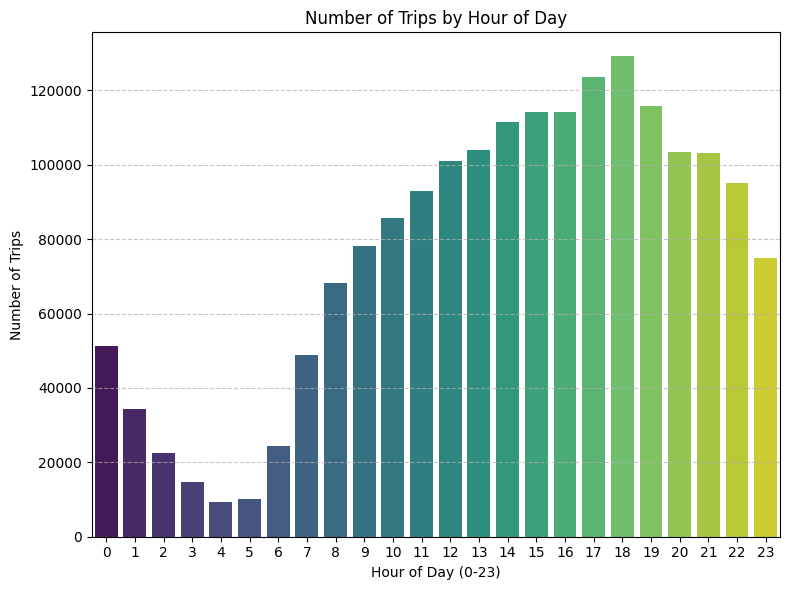

Busiest Hour: 18:00 with 129182 trips.


In [92]:
# Visualise the number of trips per hour and find the busiest hour
# Count number of trips per hour
trips_by_hour = nyc_2023_eda['pickup_hour'].value_counts().sort_index()

# Visualize the number of trips per hour
plt.figure(figsize=(8, 6))
sns.barplot(x=trips_by_hour.index, y=trips_by_hour.values, palette='viridis')
plt.title('Number of Trips by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Find the busiest hour
busiest_hour = trips_by_hour.idxmax()
busiest_hour_count = trips_by_hour.max()

print(f"Busiest Hour: {busiest_hour}:00 with {busiest_hour_count} trips.")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

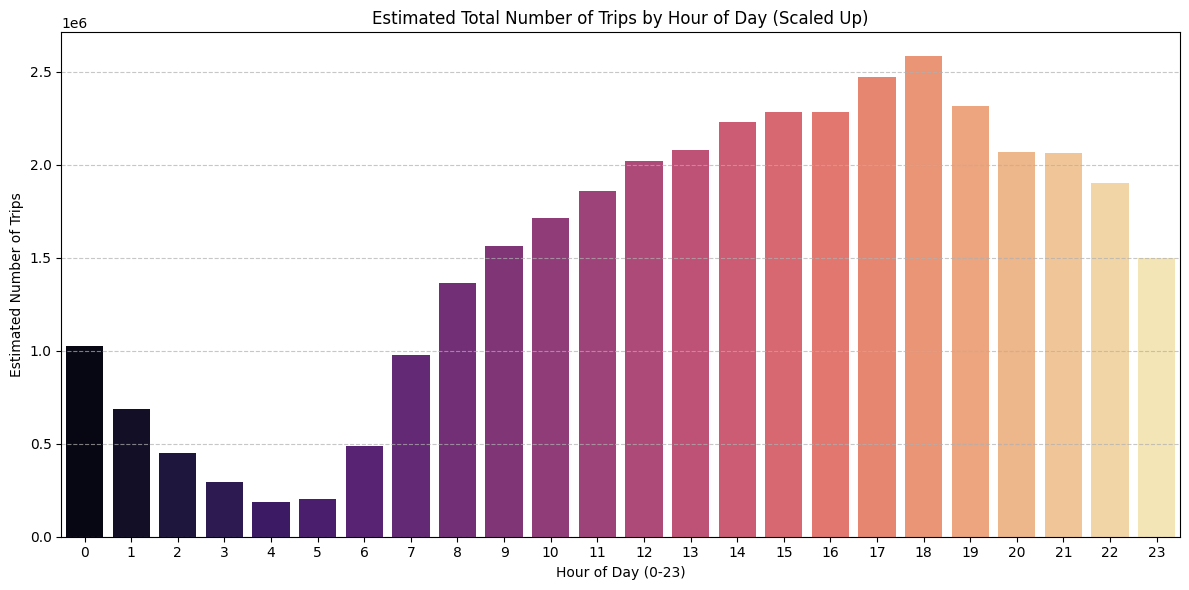

Estimated busiest hour: 18:00 with ~2,583,640 trips.


In [94]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

# Scale up the hourly trip counts
scaled_trips_by_hour = trips_by_hour / sample_fraction

# Visualize scaled data
plt.figure(figsize=(12, 6))
sns.barplot(x=scaled_trips_by_hour.index, y=scaled_trips_by_hour.values, palette='magma')
plt.title('Estimated Total Number of Trips by Hour of Day (Scaled Up)')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Estimated Number of Trips')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Busiest hour with scaled number
busiest_hour_scaled = scaled_trips_by_hour.idxmax()
busiest_hour_count_scaled = scaled_trips_by_hour.max()

print(f"Estimated busiest hour: {busiest_hour_scaled}:00 with ~{int(busiest_hour_count_scaled):,} trips.")

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

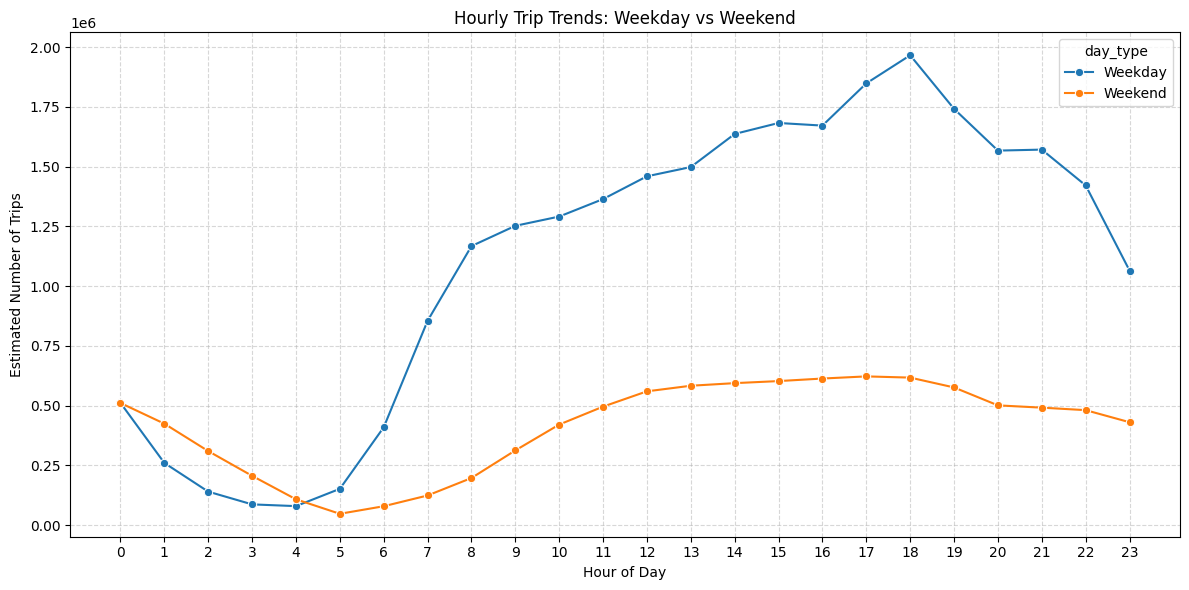

In [98]:
# Compare traffic trends for the week days and weekends
df_with_day_type = nyc_2023_eda.copy()
df_with_day_type['day_type'] = df_with_day_type['pickup_day_of_week'].apply(
    lambda x: 'Weekend' if x >= 5 else 'Weekday'
)

# Group by pickup hour and day type to get trip counts
hourly_trip_counts = df_with_day_type.groupby(['pickup_hour', 'day_type']).size().reset_index(name='trip_count')

# Scale up the counts using sample fraction
sample_fraction = 0.05  # Replace this with your actual sampling rate if it's different
hourly_trip_counts['trip_count_scaled'] = hourly_trip_counts['trip_count'] / sample_fraction

# Plot the result
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_trip_counts, x='pickup_hour', y='trip_count_scaled', hue='day_type', marker='o')
plt.title('Hourly Trip Trends: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [100]:
df_with_pickup_zone = nyc_2023_eda.merge(
    zones[['LocationID', 'zone']], 
    how='left', 
    left_on='PULocationID', 
    right_on='LocationID'
).rename(columns={'zone': 'pickup_zone'}).drop(columns=['LocationID'])

# Merge dropoff zone data
df_with_zones = df_with_pickup_zone.merge(
    zones[['LocationID', 'zone']], 
    how='left', 
    left_on='DOLocationID', 
    right_on='LocationID'
).rename(columns={'zone': 'dropoff_zone'}).drop(columns=['LocationID'])


In [102]:
# Find top 10 pickup and dropoff zones
top10_pickup_zones = (
    df_with_zones['pickup_zone']
    .value_counts()
    .head(10)
    .index
)

top10_dropoff_zones = (
    df_with_zones['dropoff_zone']
    .value_counts()
    .head(10)
    .index
)

In [106]:
top10_pickup_zones

Index(['JFK Airport', 'Upper East Side South', 'Midtown Center',
       'Upper East Side North', 'Midtown East', 'LaGuardia Airport',
       'Penn Station/Madison Sq West', 'Times Sq/Theatre District',
       'Lincoln Square East', 'Murray Hill'],
      dtype='object', name='pickup_zone')

In [108]:
top10_dropoff_zones

Index(['Upper East Side North', 'Upper East Side South', 'Midtown Center',
       'Times Sq/Theatre District', 'Murray Hill', 'Midtown East',
       'Lincoln Square East', 'Upper West Side South', 'Lenox Hill West',
       'East Chelsea'],
      dtype='object', name='dropoff_zone')

In [110]:
# Filter only top pickup and dropoff zones
pickup_filtered = df_with_zones[df_with_zones['pickup_zone'].isin(top10_pickup_zones)]
dropoff_filtered = df_with_zones[df_with_zones['dropoff_zone'].isin(top10_dropoff_zones)]

In [112]:
pickup_trends = (
    pickup_filtered.groupby(['pickup_hour', 'pickup_zone'])
    .size()
    .reset_index(name='trip_count')
)

dropoff_trends = (
    dropoff_filtered.groupby(['pickup_hour', 'dropoff_zone'])
    .size()
    .reset_index(name='trip_count')
)


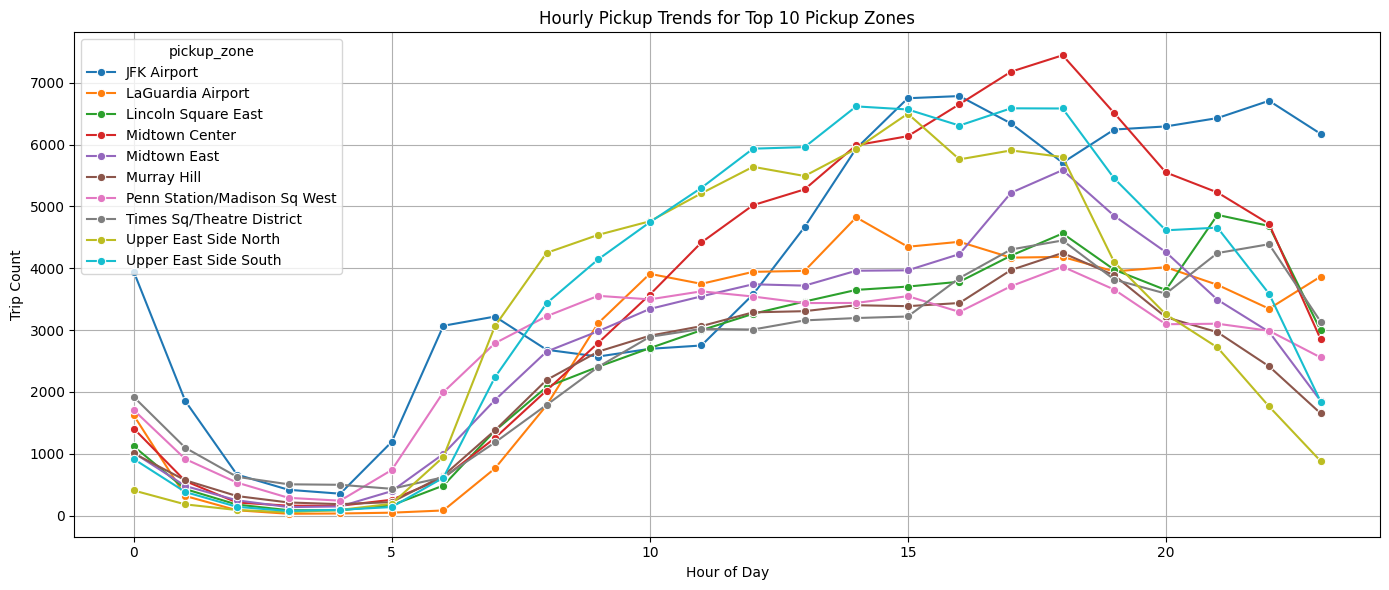

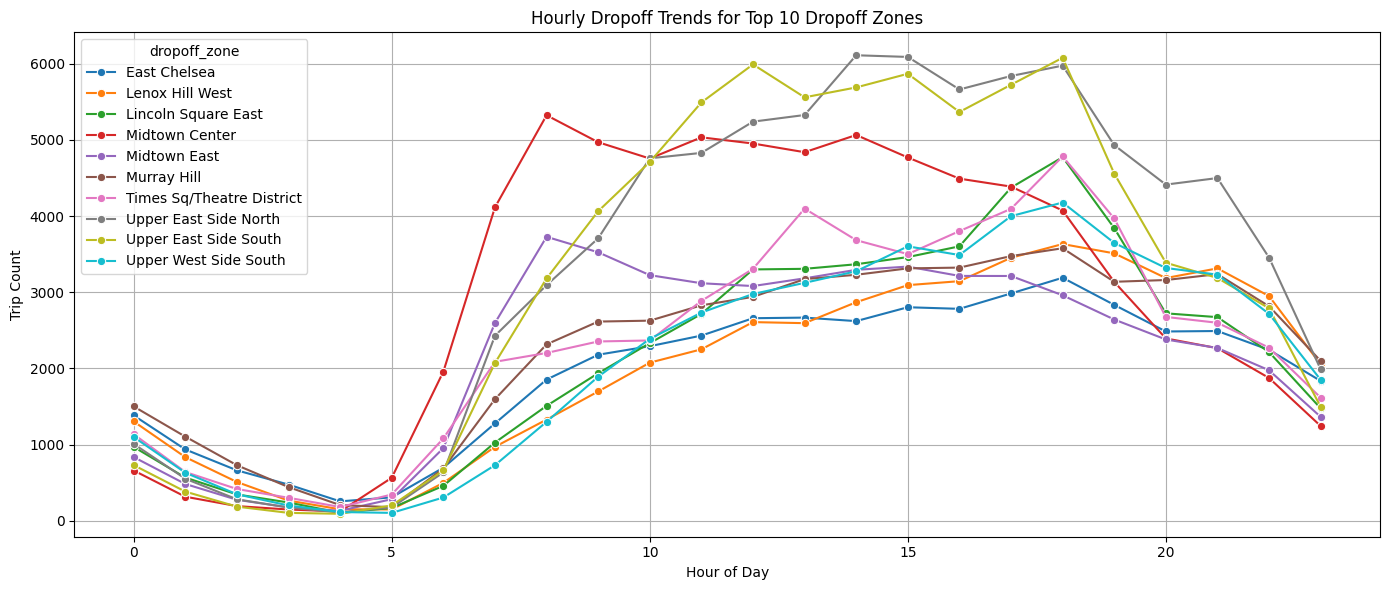

In [114]:
# Plot pickup trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=pickup_trends, x='pickup_hour', y='trip_count', hue='pickup_zone', marker='o')
plt.title('Hourly Pickup Trends for Top 10 Pickup Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot dropoff trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=dropoff_trends, x='pickup_hour', y='trip_count', hue='dropoff_zone', marker='o')
plt.title('Hourly Dropoff Trends for Top 10 Dropoff Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Count')
plt.grid(True)
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [116]:
pickup_counts = (
    df_with_zones['pickup_zone']
    .value_counts()
    .rename('pickup_count')
    .reset_index()
    .rename(columns={'index': 'zone'})
)

# Count dropoffs per zone
dropoff_counts = (
    df_with_zones['dropoff_zone']
    .value_counts()
    .rename('dropoff_count')
    .reset_index()
    .rename(columns={'index': 'zone'})
)

In [121]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Merge on zone name
combined = pd.merge(pickup_counts, dropoff_counts,
                    left_on='pickup_zone',
                    right_on='dropoff_zone',
                    how='inner')

# Calculate the ratio
combined['pickup_dropoff_ratio'] = combined['pickup_count'] / combined['dropoff_count']

# Sort for top 10
top_10 = combined.sort_values('pickup_dropoff_ratio', ascending=False).head(10)

# Sort for bottom 10
bottom_10 = combined.sort_values('pickup_dropoff_ratio', ascending=True).head(10)

# Display
print("Top 10 pickup/dropoff ratios:")
print(top_10[['pickup_zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print("\nBottom 10 pickup/dropoff ratios:")
print(bottom_10[['pickup_zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

Top 10 pickup/dropoff ratios:
                     pickup_zone  pickup_count  dropoff_count  \
46                 East Elmhurst          8363           1001   
0                    JFK Airport         97005          20962   
5              LaGuardia Airport         64274          22249   
6   Penn Station/Madison Sq West         63479          40115   
30       Greenwich Village South         24118          17539   
24                  Central Park         30752          22367   
18                  West Village         40406          30466   
4                   Midtown East         65637          52249   
2                 Midtown Center         85951          71643   
26              Garment District         30213          25345   

    pickup_dropoff_ratio  
46              8.354645  
0               4.627660  
5               2.888849  
6               1.582426  
30              1.375107  
24              1.374883  
18              1.326265  
4               1.256235  
2          

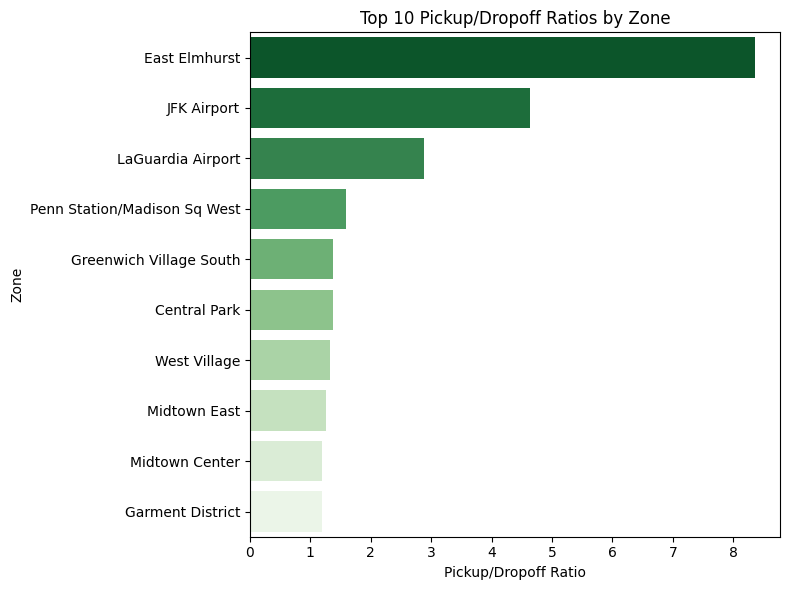

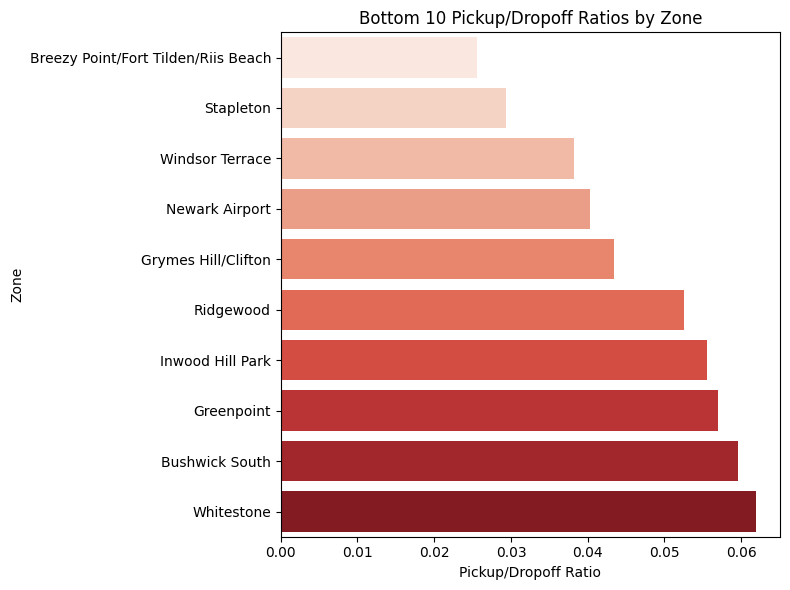

In [125]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_10,
    x='pickup_dropoff_ratio',
    y='pickup_zone',
    palette='Greens_r'
)
plt.title('Top 10 Pickup/Dropoff Ratios by Zone')
plt.xlabel('Pickup/Dropoff Ratio')
plt.ylabel('Zone')
plt.tight_layout()
plt.show()

# Bottom 10 visualization
plt.figure(figsize=(8, 6))
sns.barplot(
    data=bottom_10,
    x='pickup_dropoff_ratio',
    y='pickup_zone',
    palette='Reds'
)
plt.title('Bottom 10 Pickup/Dropoff Ratios by Zone')
plt.xlabel('Pickup/Dropoff Ratio')
plt.ylabel('Zone')
plt.tight_layout()
plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [127]:
night_hours = nyc_2023_eda[
    (nyc_2023_eda['pickup_hour'] >= 23) | (nyc_2023_eda['pickup_hour'] <= 5)
]

In [129]:
# Step 2: Merge pickup zone info
night_pickups = night_hours.merge(zones[['LocationID', 'zone']], how='left', left_on='PULocationID', right_on='LocationID')

# Step 3: Merge dropoff zone info
night_dropoffs = night_hours.merge(zones[['LocationID', 'zone']], how='left', left_on='DOLocationID', right_on='LocationID')


In [131]:
# Step 4: Count pickups by zone
pickup_night_counts = night_pickups['zone'].value_counts().reset_index()
pickup_night_counts.columns = ['zone', 'pickup_count']

# Step 5: Count dropoffs by zone
dropoff_night_counts = night_dropoffs['zone'].value_counts().reset_index()
dropoff_night_counts.columns = ['zone', 'dropoff_count']

In [133]:
print("Top 10 pickup zones during night hours (11PM–5AM):")
print(pickup_night_counts.head(10))

print("\nTop 10 dropoff zones during night hours (11PM–5AM):")
print(dropoff_night_counts.head(10))

Top 10 pickup zones during night hours (11PM–5AM):
                           zone  pickup_count
0                  East Village         15549
1                   JFK Airport         14544
2                  West Village         12472
3                  Clinton East         10463
4               Lower East Side          9629
5       Greenwich Village South          8749
6     Times Sq/Theatre District          8206
7  Penn Station/Madison Sq West          6968
8                 Midtown South          6143
9                  East Chelsea          6050

Top 10 dropoff zones during night hours (11PM–5AM):
                        zone  dropoff_count
0               East Village           8313
1               Clinton East           6874
2                Murray Hill           6265
3               East Chelsea           5858
4                   Gramercy           5756
5            Lenox Hill West           5271
6             Yorkville West           4977
7               West Village          

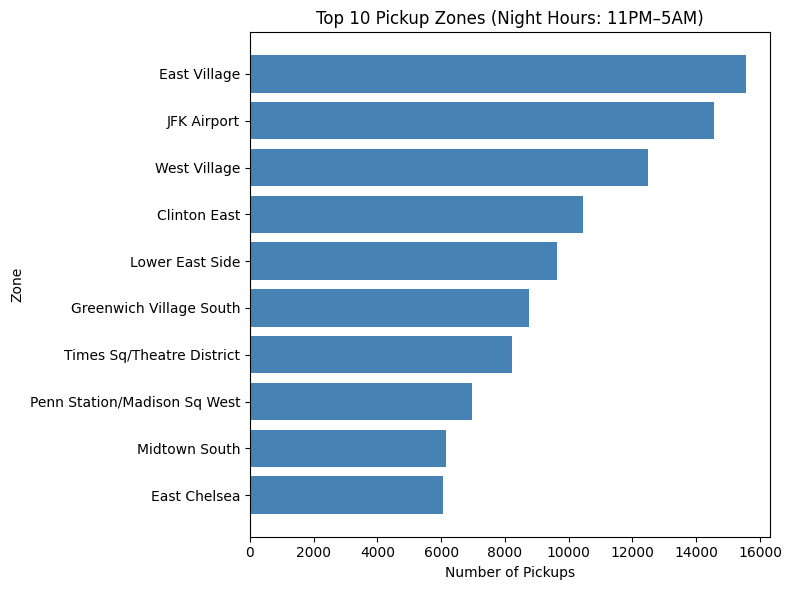

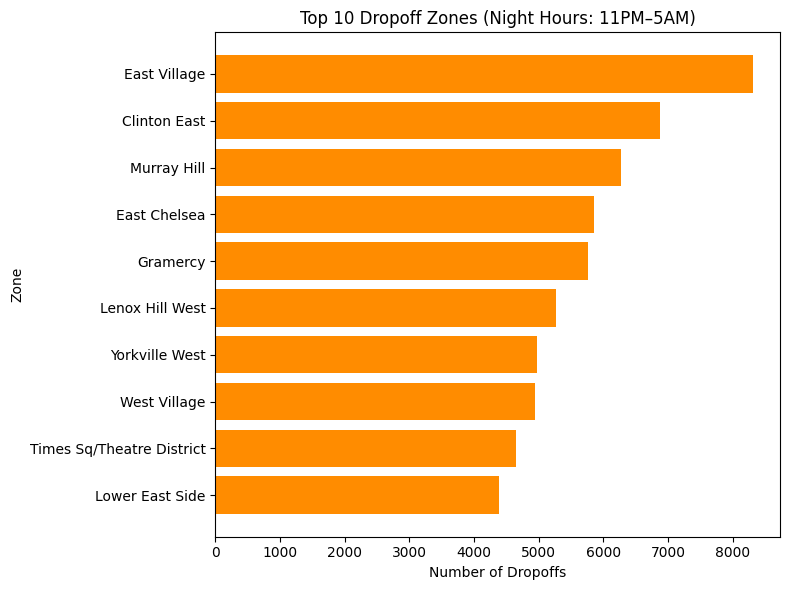

In [135]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
plt.figure(figsize=(8, 6))
plt.barh(pickup_night_counts['zone'].head(10)[::-1], pickup_night_counts['pickup_count'].head(10)[::-1], color='steelblue')
plt.title('Top 10 Pickup Zones (Night Hours: 11PM–5AM)')
plt.xlabel('Number of Pickups')
plt.ylabel('Zone')
plt.tight_layout()
plt.show()

# Plotting top 10 night-time dropoff zones
plt.figure(figsize=(8, 6))
plt.barh(dropoff_night_counts['zone'].head(10)[::-1], dropoff_night_counts['dropoff_count'].head(10)[::-1], color='darkorange')
plt.title('Top 10 Dropoff Zones (Night Hours: 11PM–5AM)')
plt.xlabel('Number of Dropoffs')
plt.ylabel('Zone')
plt.tight_layout()
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [141]:
# Filter for night hours (11 PM to 5 AM)
# Separate night and day time data

night_hours = [23, 0, 1, 2, 3, 4, 5]

# Filter for night hours
night_data = nyc_2023_eda[nyc_2023_eda['pickup_hour'].isin(night_hours)]
day_data = nyc_2023_eda[~nyc_2023_eda['pickup_hour'].isin(night_hours)]

# Calculate revenue statistics
total_revenue = nyc_2023_eda['total_amount'].sum()
night_revenue = night_data['total_amount'].sum()
day_revenue = day_data['total_amount'].sum()
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

# Print results
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Nighttime Revenue Share: {night_share:.2f}%")
print(f"Daytime Revenue Share: {day_share:.2f}%")

Total Revenue: $52,854,071.11
Nighttime Revenue Share: 12.09%
Daytime Revenue Share: 87.91%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [143]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter out invalid entries
df_valid = nyc_2023_eda[
    (nyc_2023_eda['trip_distance'] > 0) & 
    (nyc_2023_eda['passenger_count'] > 0)
].copy()

# Calculate fare per mile per passenger
df_valid['fare_per_mile_per_passenger'] = df_valid['fare_amount'] / (df_valid['trip_distance'] * df_valid['passenger_count'])

# Group by passenger count and calculate average fare per mile per passenger
avg_fare_per_mile_per_passenger = df_valid.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Display result
print(avg_fare_per_mile_per_passenger)


   passenger_count  fare_per_mile_per_passenger
0              1.0                    10.863404
1              2.0                     6.431851
2              3.0                     3.907812
3              4.0                     4.362764
4              5.0                     1.709614
5              6.0                     1.350744


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [145]:
nyc_2023_eda['fare_per_mile'] = nyc_2023_eda['total_amount'] / nyc_2023_eda['trip_distance']


In [147]:
nyc_2023_eda['fare_per_mile'].isna().sum()


180

In [149]:
df_nyc = nyc_2023_eda.dropna(subset=['fare_per_mile'])


In [151]:
# Compare the average fare per mile for different days and for different times of the day
# Average fare per mile by hour
fare_by_hour = df_nyc.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()

# Average fare per mile by day of week
fare_by_day = df_nyc.groupby('pickup_day_of_week')['fare_per_mile'].mean().reset_index()

# Map numeric day to weekday name
import calendar
fare_by_day['pickup_day_of_week'] = fare_by_day['pickup_day_of_week'].apply(lambda x: calendar.day_name[x])

In [155]:
# plt.figure(figsize=(12, 10))

# # Top: Hourly
# plt.subplot(2, 1, 1)
# sns.barplot(data=fare_by_hour, x='pickup_hour', y='fare_per_mile', palette='Blues_d')
# plt.title('Average Fare per Mile by Hour of Day')
# plt.xlabel('Hour of Day')
# plt.ylabel('Fare per Mile ($)')

# # Bottom: Daily
# plt.subplot(2, 1, 2)
# sns.barplot(
#     data=fare_by_day,
#     x='pickup_day_of_week',
#     y='fare_per_mile',
#     order=calendar.day_name,
#     palette='Greens_d'
# )
# plt.title('Average Fare per Mile by Day of Week')
# plt.xlabel('Day of Week')
# plt.ylabel('Fare per Mile ($)')
# plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

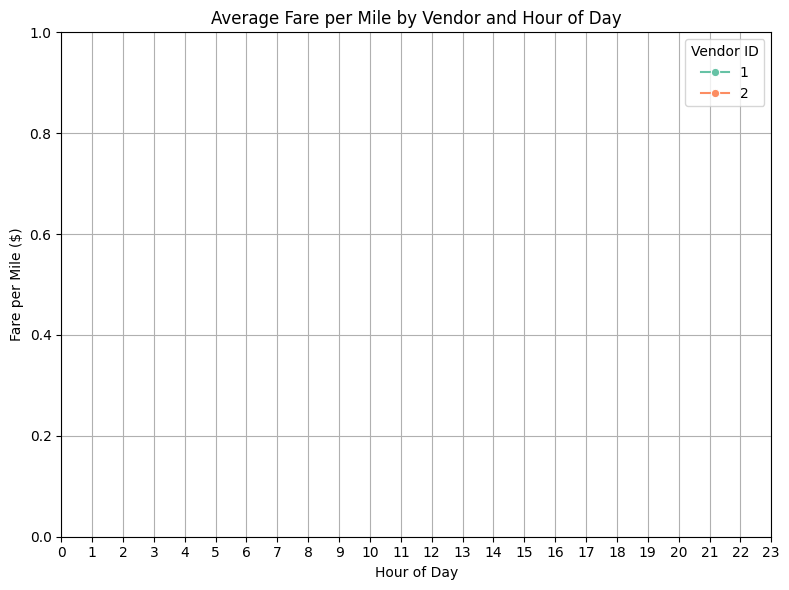

In [159]:
# Compare fare per mile for different vendors
vendor_hourly_fare = df_nyc.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.lineplot(
    data=vendor_hourly_fare,
    x='pickup_hour',
    y='fare_per_mile',
    hue='VendorID',
    palette='Set2',
    marker='o'
)
plt.title('Average Fare per Mile by Vendor and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile ($)')
plt.xticks(range(0, 24))
plt.legend(title='Vendor ID')
plt.grid(True)
plt.tight_layout()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [161]:
# Defining distance tiers
def assign_tier(dist):
    if dist <= 2:
        return '0–2 miles'
    elif 2 < dist <= 5:
        return '2–5 miles'
    else:
        return '5+ miles'

df = nyc_2023_eda.dropna(subset=['fare_per_mile', 'trip_distance', 'VendorID'])
df['distance_tier'] = df['trip_distance'].apply(assign_tier)
tiered_vendor_fares = df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()


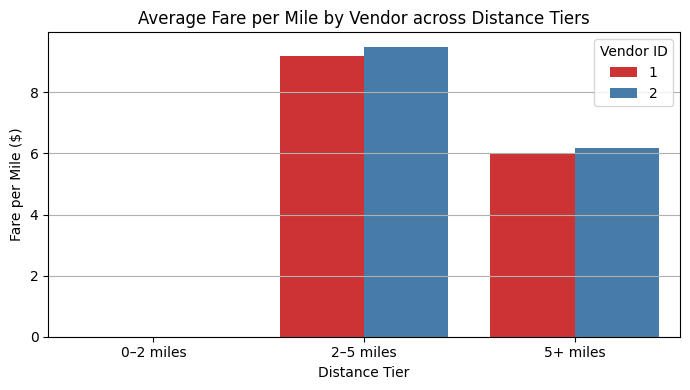

In [163]:
plt.figure(figsize=(7, 4))
sns.barplot(
    data=tiered_vendor_fares,
    x='distance_tier',
    y='fare_per_mile',
    hue='VendorID',
    palette='Set1'
)

plt.title('Average Fare per Mile by Vendor across Distance Tiers')
plt.xlabel('Distance Tier')
plt.ylabel('Fare per Mile ($)')
plt.grid(True, axis='y')
plt.legend(title='Vendor ID')
plt.tight_layout()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [165]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_tip = nyc_2023_eda.copy()

# Avoid division by zero
df_tip = df_tip[df_tip['total_amount'] > 0]

# Calculate tip percentage
df_tip['tip_pct'] = (df_tip['tip_amount'] / df_tip['total_amount']) * 100

def bucket_distance(d):
    if d <= 1:
        return '0–1 mile'
    elif d <= 3:
        return '1–3 miles'
    elif d <= 5:
        return '3–5 miles'
    elif d <= 10:
        return '5–10 miles'
    else:
        return '10+ miles'

df_tip['distance_bucket'] = df_tip['trip_distance'].apply(bucket_distance)
tip_by_distance = df_tip.groupby('distance_bucket')['tip_pct'].mean().reset_index()

tip_by_passengers = df_tip.groupby('passenger_count')['tip_pct'].mean().reset_index()

tip_by_hour = df_tip.groupby('pickup_hour')['tip_pct'].mean().reset_index()

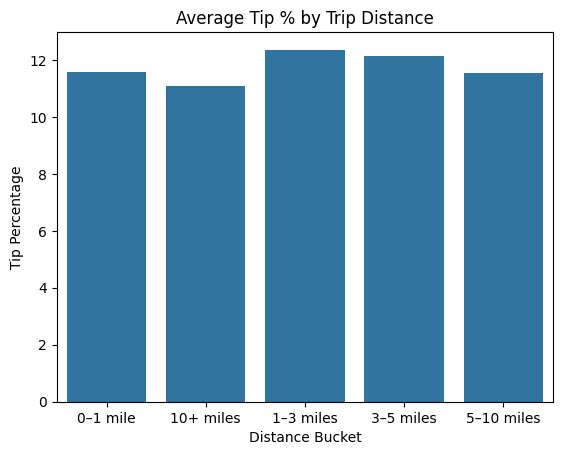

In [167]:
sns.barplot(data=tip_by_distance, x='distance_bucket', y='tip_pct')
plt.title('Average Tip % by Trip Distance')
plt.xlabel('Distance Bucket')
plt.ylabel('Tip Percentage')
plt.show()

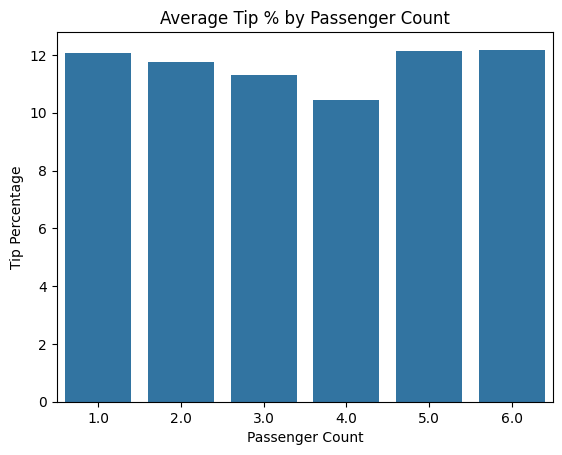

In [169]:
sns.barplot(data=tip_by_passengers, x='passenger_count', y='tip_pct')
plt.title('Average Tip % by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage')
plt.show()

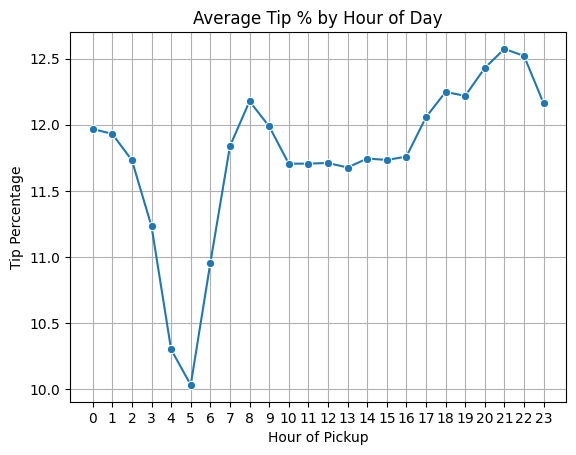

In [171]:
sns.lineplot(data=tip_by_hour, x='pickup_hour', y='tip_pct', marker='o')
plt.title('Average Tip % by Hour of Day')
plt.xlabel('Hour of Pickup')
plt.ylabel('Tip Percentage')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

                 Low Tip (<10%)  High Tip (>25%)
trip_distance          3.584075         2.191665
trip_duration         18.798928        12.610358
passenger_count        1.408663         1.369357
fare_amount           20.627702        13.892134


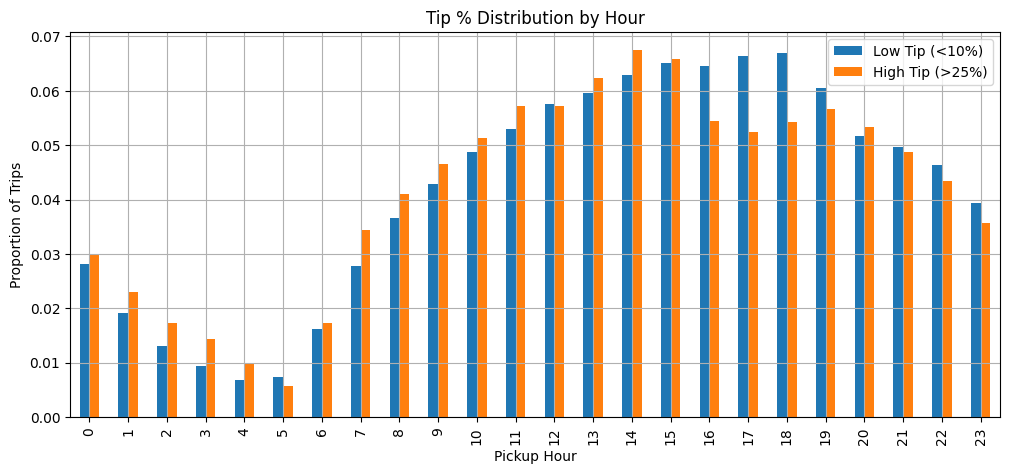

In [196]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

df_tip['tpep_pickup_datetime'] = pd.to_datetime(df_tip['tpep_pickup_datetime'])
df_tip['tpep_dropoff_datetime'] = pd.to_datetime(df_tip['tpep_dropoff_datetime'])

# Calculate duration in minutes
df_tip['trip_duration'] = (df_tip['tpep_dropoff_datetime'] - df_tip['tpep_pickup_datetime']).dt.total_seconds() / 60

low_tips = df_tip[df_tip['tip_pct'] < 10].copy()
high_tips = df_tip[df_tip['tip_pct'] > 25].copy()
comparison = pd.DataFrame({
    'Low Tip (<10%)': low_tips[['trip_distance', 'trip_duration', 'passenger_count', 'fare_amount']].mean(),
    'High Tip (>25%)': high_tips[['trip_distance', 'trip_duration', 'passenger_count', 'fare_amount']].mean()
})
print(comparison)
low_tip_hours = low_tips['pickup_hour'].value_counts(normalize=True).sort_index()
high_tip_hours = high_tips['pickup_hour'].value_counts(normalize=True).sort_index()

tip_hour_comparison = pd.DataFrame({
    'Low Tip (<10%)': low_tip_hours,
    'High Tip (>25%)': high_tip_hours
}).fillna(0)

tip_hour_comparison.plot(kind='bar', figsize=(12, 5), title="Tip % Distribution by Hour")
plt.xlabel("Pickup Hour")
plt.ylabel("Proportion of Trips")
plt.grid(True)
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

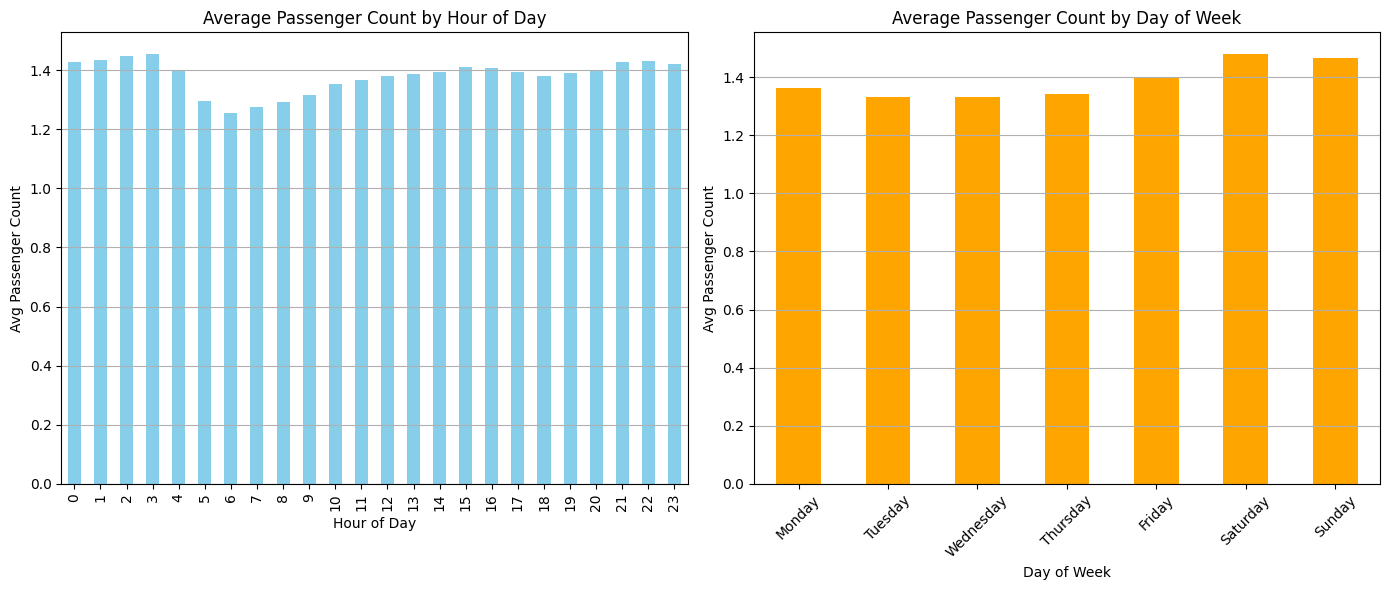

In [173]:
# See how passenger count varies across hours and days

# Average passenger count by hour
hourly_passenger_avg = nyc_2023_eda.groupby('pickup_hour')['passenger_count'].mean()

# Average passenger count by day of week
daily_passenger_avg = nyc_2023_eda.groupby('pickup_day_of_week')['passenger_count'].mean()

plt.figure(figsize=(14, 6))

# Plot hourly variation
plt.subplot(1, 2, 1)
hourly_passenger_avg.plot(kind='bar', color='skyblue')
plt.title("Average Passenger Count by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Passenger Count")
plt.grid(axis='y')

# Plot daily variation
plt.subplot(1, 2, 2)
# Map numeric days to weekday names
weekday_map = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
               4: "Friday", 5: "Saturday", 6: "Sunday"}
daily_passenger_avg.index = daily_passenger_avg.index.map(weekday_map)
daily_passenger_avg.loc[list(weekday_map.values())].plot(kind='bar', color='orange')
plt.title("Average Passenger Count by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Avg Passenger Count")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

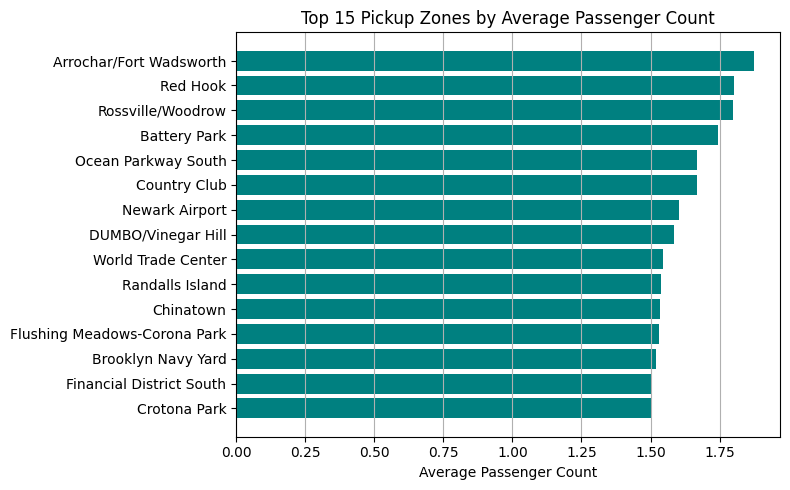

In [177]:
# How does passenger count vary across zones
zone_passenger_counts = nyc_2023_eda.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge with zone names
zone_passenger_counts = zone_passenger_counts.merge(
    zones[['LocationID', 'zone']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

# Drop rows with missing zone names
zone_passenger_counts = zone_passenger_counts.dropna(subset=['zone'])

# Convert zone to string (if needed)
zone_passenger_counts['zone'] = zone_passenger_counts['zone'].astype(str)

# Sort by passenger count
zone_passenger_counts = zone_passenger_counts.sort_values(by='passenger_count', ascending=False)
top_zones = zone_passenger_counts.head(15)

plt.figure(figsize=(8, 5))
plt.barh(top_zones['zone'], top_zones['passenger_count'], color='teal')
plt.xlabel("Average Passenger Count")
plt.title("Top 15 Pickup Zones by Average Passenger Count")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

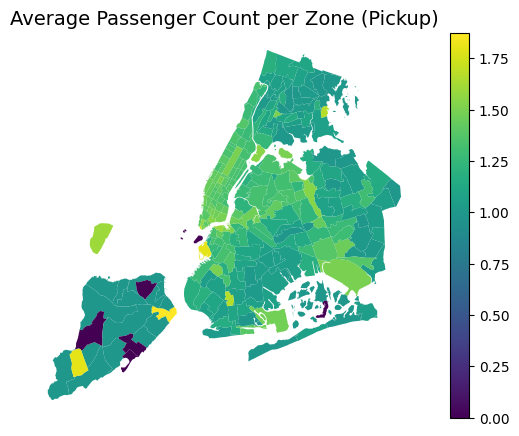

In [184]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_passenger_per_zone = nyc_2023_eda.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_per_zone.rename(columns={'PULocationID': 'LocationID', 'passenger_count': 'avg_passenger_count'}, inplace=True)
# Merge the average passenger count into the zones GeoDataFrame
zones_with_trips = zones_with_trips.merge(avg_passenger_per_zone, on='LocationID', how='left')
zones_with_trips['avg_passenger_count'] = zones_with_trips['avg_passenger_count'].fillna(0)
zones_with_trips.plot(column='avg_passenger_count', cmap='viridis', legend=True, figsize=(8, 5))
plt.title("Average Passenger Count per Zone (Pickup)", fontsize=14)
plt.axis('off')
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Surcharge Application Frequency:
{'mta_tax': '99.07%', 'improvement_surcharge': '99.96%', 'congestion_surcharge': '92.31%', 'Airport_fee': '8.79%'}


<Axes: title={'center': 'Average Surcharges by Pickup Hour'}, xlabel='pickup_hour'>

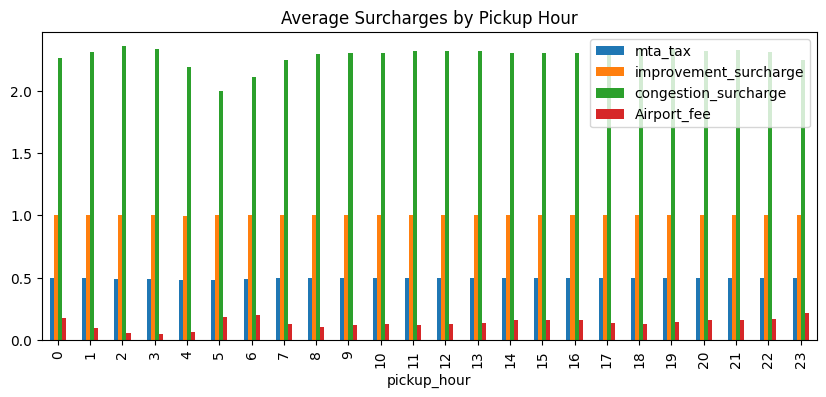

In [192]:
# How often is each surcharge applied?
surcharge_counts = {
    'mta_tax': (nyc_2023_eda['mta_tax'] > 0).sum(),
    'improvement_surcharge': (nyc_2023_eda['improvement_surcharge'] > 0).sum(),
    'congestion_surcharge': (nyc_2023_eda['congestion_surcharge'] > 0).sum(),
    'Airport_fee': (nyc_2023_eda['Airport_fee'] > 0).sum()
}

# Total trips for reference
total_trips = len(nyc_2023_eda)

# Convert to percentage
surcharge_percentages = {k: f"{(v / total_trips) * 100:.2f}%" for k, v in surcharge_counts.items()}

# Display
print("Surcharge Application Frequency:")
print(surcharge_percentages)
surcharge_by_hour = nyc_2023_eda.groupby('pickup_hour')[['mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']].mean()
surcharge_by_hour.plot(kind='bar', figsize=(10,4), title='Average Surcharges by Pickup Hour')


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Key Findings:
Peak Demand Periods: Busiest Hours: 3 PM to 7 PM (15:00–19:00), indicating evening commute hours.

Busiest Days: Thursdays recorded the highest number of pickups, followed closely by other weekdays.

Busiest Months: May and October showed the highest demand and revenue; August and September had the lowest.

Revenue Patterns: Revenue closely followed trip volume trends — high in May and October, low in August and September.
Quarterly Revenue: Q4 led with 27.1%, followed by Q2 (26.7%), Q1 (23.8%), and Q3 (22.3%).

Fare Influences: Strong positive correlations: Fare ↔ Trip Distance: 0.94, Fare ↔ Trip Duration: 0.81
Negligible correlation with passenger count (0.04), indicating that fare structures rely on time and distance rather than number of passengers.

Fare per Passenger: Decreases with more passengers; solo travelers pay significantly more per mile.

Tip Behavior: Tip percentage stable across distances (10–12%), slightly higher for 1–3 miles.Higher tips during late evening hours (around 8 PM) and for larger groups (5–6 passengers).

Geographic Insights: JFK Airport and Upper East Side (South) are among the most frequented pickup zones. Arrochar/Fort Wadsworth had the highest average passenger count per trip.

Vendor & Fare Analysis: Vendor 2 consistently had a slightly higher fare per mile, especially for longer trips. Both vendors charge the highest fare per mile for short trips (0–2 miles).

Surcharges: Congestion surcharge dominates and is applied consistently across all hours. Airport fees appear during certain times (likely early mornings and evenings), reflecting flight schedules.



Recommendations
1.  Demand-Based Routing & Dispatching
Increase fleet availability during 3–7 PM, especially on weekdays, to align with peak demand.
Thursdays, May, and October should see increased driver deployment.
Late-night hours (20:00+) could use slightly more drivers to meet higher tipping incentive and airport pickups.

2. Optimize Routing:
Prioritize routes to and from JFK Airport and Upper East Side, given high pickup frequency.
Monitor congestion zones proactively — use real-time traffic data to minimize surcharge costs and delays.

3. Fare Strategy Adjustments:
Consider incentivizing group travel — since fare per person drops with more passengers, offering discounts or promotions may boost shared rides. Explore dynamic pricing during peak tipping hours or high-demand slots.

4. Operational Efficiency:
Monitor idle times and reallocate cabs from low-demand zones like Fort Wadsworth to busier zones.
Use zone-level demand heatmaps to preposition drivers where demand is expected to spike.

5. Strategic Planning by Quarter:
Use Q1 and Q3 (slower quarters) to schedule vehicle maintenance or reduce fleet slightly to optimize costs.
Allocate marketing budget and driver incentives toward Q2 and Q4 when revenue potential is higher.

This comprehensive analysis shows clear spatiotemporal patterns in NYC taxi operations. By aligning supply with predictable demand trends — time of day, day of week, location, and passenger behavior — fleet efficiency and customer satisfaction can both be optimized. A data-driven approach to dispatch, routing, and pricing will ensure better service delivery and profitability.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

To optimize cab positioning and fleet deployment, a dynamic strategy that aligns with day-of-week, time-of-day, zone-specific, and seasonal patterns is essential. From Monday to Wednesday, operations should focus on balancing coverage across mid-level business and residential areas such as Midtown, East Harlem, and parts of Queens. On Thursdays—identified as the peak activity day—the fleet should concentrate in Upper Manhattan, JFK, and Downtown to accommodate the end-of-week surge. Friday and Saturday demand shifts toward airports, nightlife hubs, SoHo, and Brooklyn hotspots, reflecting increased leisure travel and long-distance trips. Sundays should emphasize JFK/LGA airports and hotel zones, with a focus on return trips and moderate recovery of low weekend demand.


Strategically, several high-demand zones require consistent prioritization. JFK Airport consistently records the highest trip volumes, making it a key long-haul and revenue-generating hub. The Upper East Side (South) supports steady local and medium-distance travel, while Downtown Manhattan and Midtown (East and West) drive significant weekday traffic due to business, tourism, and hospitality activities. Chelsea and SoHo become critical zones for evening and weekend entertainment traffic.


Seasonality also influences demand significantly. In high-revenue months like May and October, a city-wide deployment strategy should be employed, especially near Central Park, SoHo, and major airports. From June through August, with tourist activity peaking, cab coverage should be intensified near attractions such as Times Square, museums, ferry terminals, and major hotels—though longer idle times may be expected. During the slower months of August and September, the fleet can be scaled down or scheduled for maintenance while focusing service in core commuter and airport zones. In winter (December to February), attention must be given to weather-related delays and increased airport trips, with a heavier focus on business districts and shopping areas.


Time-of-day trends also guide optimal fleet distribution. In the morning (6–10 AM), cabs should be positioned in residential areas of Brooklyn, Queens, and the Upper East Side to serve commuters heading to work or transit hubs like Penn Station and Grand Central. During the midday window (10 AM–3 PM), tourist and business zones such as Midtown, Times Square, and the Financial District see high activity. Evening peak hours (3–7 PM) require greater coverage in business zones, JFK, Midtown, and the Upper West Side, driven by post-work travel and airport flows. At night (8 PM–12 AM), Lower Manhattan, Chelsea, and SoHo become critical zones for nightlife-related demand, often associated with higher tipping. Late night (12–5 AM) coverage should prioritize airports and major transit hubs, serving overnight flight passengers and early morning departures.

By aligning fleet positioning and coverage strategies with these data-backed trends, operators can significantly enhance supply-demand balance, reduce idle time, and increase revenue per vehicle-hour.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Distance-Based Fare Adjustments
1. Insight Used: Trips of 2–5 miles show higher fare per mile, while longer trips (5+ miles) have lower fare per mile across vendors.
Recommendation: Introduce tiered pricing that adjusts per-mile rates downward gradually, not sharply, for longer distances. Ex: Instead of a flat drop after 5 miles, introduce smoother brackets (e.g., 5–8 mi, 8–12 mi).
For short trips (0–2 mi), consider a minimum fare threshold to compensate for idle time and low efficiency.

2. Time-Based Dynamic Pricing
Insight Used: Peak demand is between 3 PM to 7 PM and tip percentages are higher during night hours (especially around 8 PM).
Recommendation: Implement time-based surge pricing during peak demand slots,Ex: 3–7 PM (weekday evenings), 8 PM–12 AM (weekends). Keep moderate fare multipliers (1.2x–1.4x) to remain attractive vs. competitors. Offer fare discounts or loyalty points for off-peak hours to smooth demand (e.g., 11 AM–2 PM).


3. Zone-Based Pricing Optimization
Insight Used: High-demand zones like JFK, Upper East Side, and Midtown see higher trip volumes and revenue.
Recommendation: Introduce zone-based flat rates or caps for: JFK ↔ Manhattan, Midtown ↔ Tourist hubs. Consider surcharges for high-congestion pickup zones (e.g., near Penn Station, Times Square).


4. Passenger Count Incentives
Insight Used: Fare per passenger decreases as group size increases, e.g., 1 passenger = $10.86 vs. 6 passengers = $1.35.
Recommendation: Market group discounts explicitly to boost shared ride bookings. Introduce "group saver" pricing models: Slightly higher base fare for solo riders, lower per-passenger for 3+ riders.

5. Tip Integration into Fare Structure
Insight Used: Tip amounts correlate strongly with distance and night hours.
Recommendation: Offer “fare + suggested tip” checkout screens to encourage preset tips (e.g., 15%, 18%, 20%). Test including tips in bundled fare offers during off-peak hours to appeal to value-sensitive customers.
